In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            69.0        Improved                 1986      147000.0  
1            61.0        Improved                 1986      144000.0  
2            73.0  New Generation                 1976      159000.0  
3            73.0  New Generation                 1976      167000.0  
4            67.0  New Generation                 1976      163000.0

In [32]:
flat_type = pd.DataFrame(data[['flat_type']])
mapping = {'1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}
data['flat_type_num'] = flat_type['flat_type'].map(mapping)

storey_range = pd.DataFrame(data[['storey_range']])
mapping = {'01 TO 03': 2, '04 TO 06': 5, '07 TO 09': 8, '10 TO 12': 11, '13 TO 15': 14, '16 TO 18': 17, '19 TO 21': 20, '22 TO 24': 23, '25 TO 27': 26, '28 TO 30': 29, '31 TO 33': 32, '34 TO 36': 35, '37 TO 39': 38, '40 TO 42': 41}
data['Story_range_num'] = storey_range["storey_range"].map(mapping)

flat_model = pd.DataFrame(data[['flat_model']])
mapping = {'2-room': 1, 'Adjoined flat': 2, 'Apartment': 3, 'Improved': 4, 'Improved-Maisonette': 5, 'Maisonette': 6, 'Model A-Maisonette': 7, 'Model A2': 8, 'Multi Generation': 9, 'New Generation': 10, 'Premium Apartment': 11, 'Premium Maisonette': 12, 'Simplified': 13, 'Standard': 14, 'Terrace': 15}
data['flat_model_num'] = flat_model['flat_model'].map(mapping)

In [33]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

print(data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (369651, 13)
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
flat_type_num            int64
Story_range_num          int64
flat_model_num         float64
dtype: object


In [25]:
NumData = pd.DataFrame(data[['floor_area_sqm', 'flat_type_num','Story_range_num']])
NumData.head()

floor_area_sqm  flat_type_num  Story_range_num
0            69.0              3                8
1            61.0              3                5
2            73.0              3                8
3            73.0              3                8
4            67.0              3                8

In [26]:
NumData.describe()

floor_area_sqm  flat_type_num  Story_range_num
count   369651.000000  369651.000000    369651.000000
mean        96.586204       4.036442         7.497017
std         25.598886       0.934767         4.518521
min         28.000000       1.000000         2.000000
25%         73.000000       3.000000         5.000000
50%        100.000000       4.000000         8.000000
75%        115.000000       5.000000        11.000000
max        297.000000       7.000000        41.000000

In [27]:
NumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   floor_area_sqm   369651 non-null  float64
 1   flat_type_num    369651 non-null  int64  
 2   Story_range_num  369651 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 8.5 MB


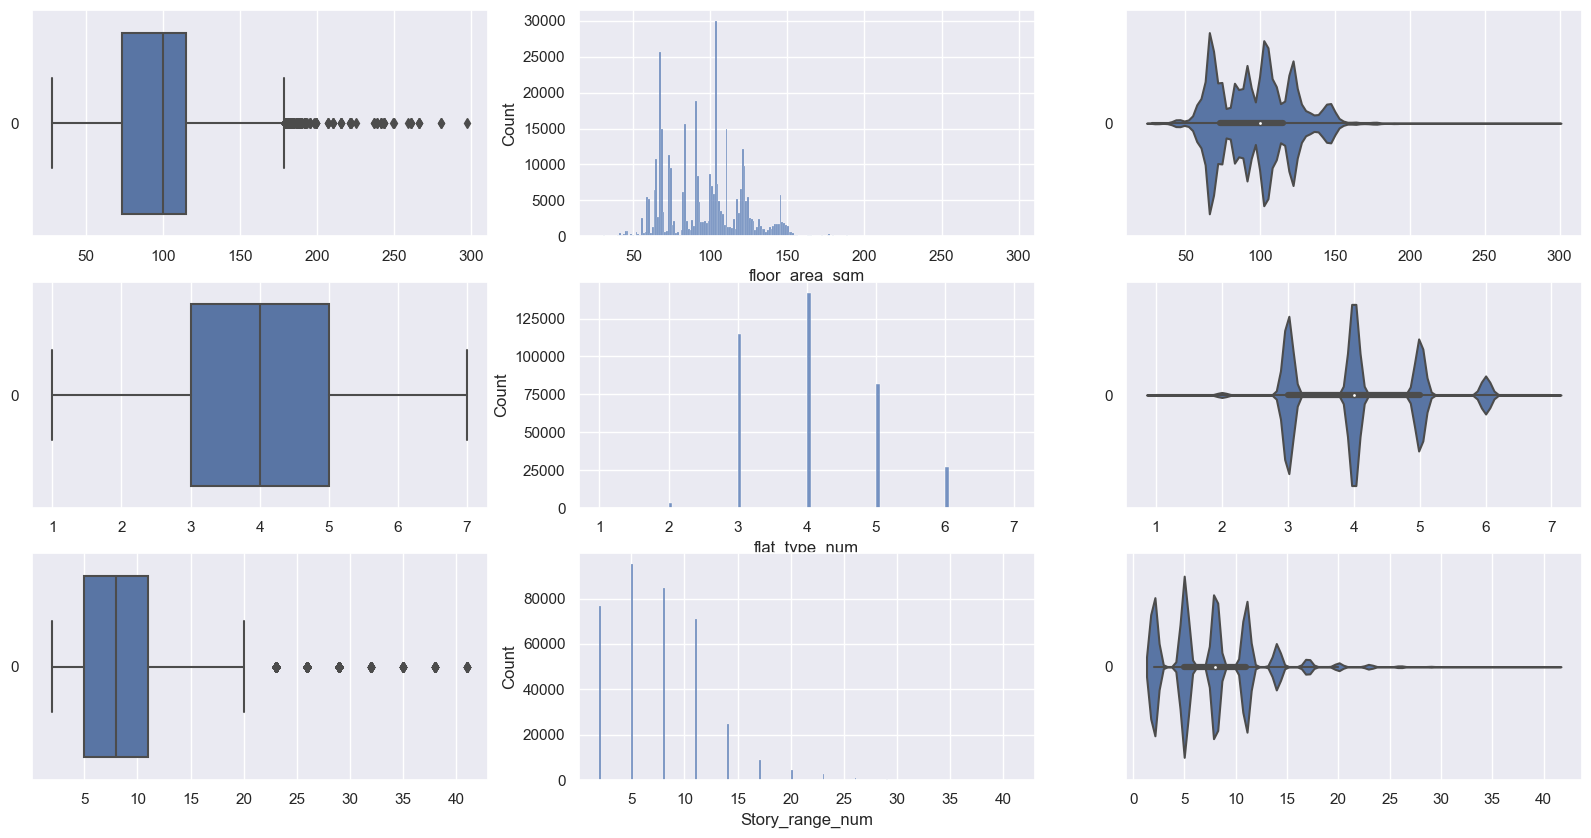

In [29]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(20, 10))

count = 0
for var in NumData:
    sb.boxplot(data = NumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumData[var], ax = axes[count,1])
    sb.violinplot(data = NumData[var], orient = "h", ax = axes[count,2])
    count += 1

In [30]:
# Calculate the quartiles
Q1 = NumData.quantile(0.25)
Q3 = NumData.quantile(0.75)

# Rule to identify outliers
rule = ((NumData < (Q1 - 1.5 * (Q3 - Q1))) | (NumData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

floor_area_sqm      595
flat_type_num         0
Story_range_num    4073
dtype: int64

In [9]:
# Compute the skewness
NumData.skew()

floor_area_sqm         0.310634
lease_commence_date   -0.108738
dtype: float64

                 floor_area_sqm  flat_type_num  Story_range_num  resale_price
floor_area_sqm         1.000000       0.951194         0.078333      0.690142
flat_type_num          0.951194       1.000000         0.111050      0.705449
Story_range_num        0.078333       0.111050         1.000000      0.219342
resale_price           0.690142       0.705449         0.219342      1.000000


<AxesSubplot:>

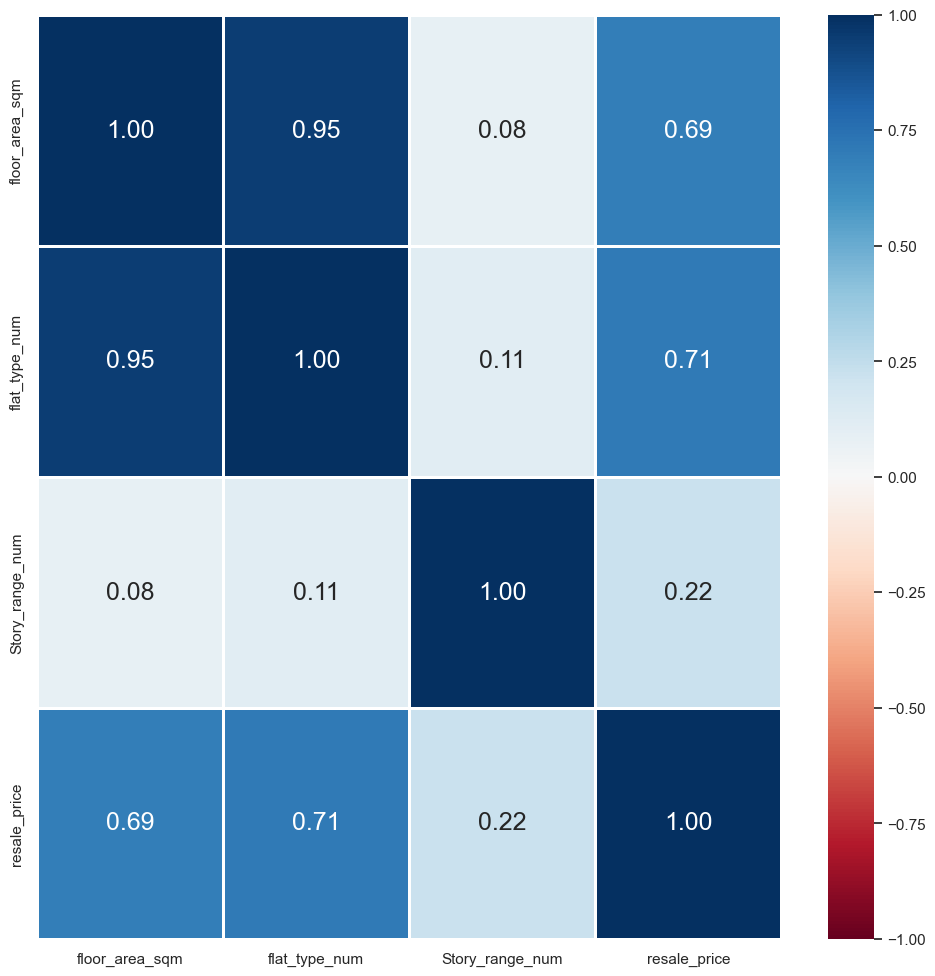

In [31]:
# Add ResalePrice to the dataframe
NumData = pd.concat([NumData, data["resale_price"]], axis = 1).reindex(NumData.index)

# Correlation Matrix
print(NumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

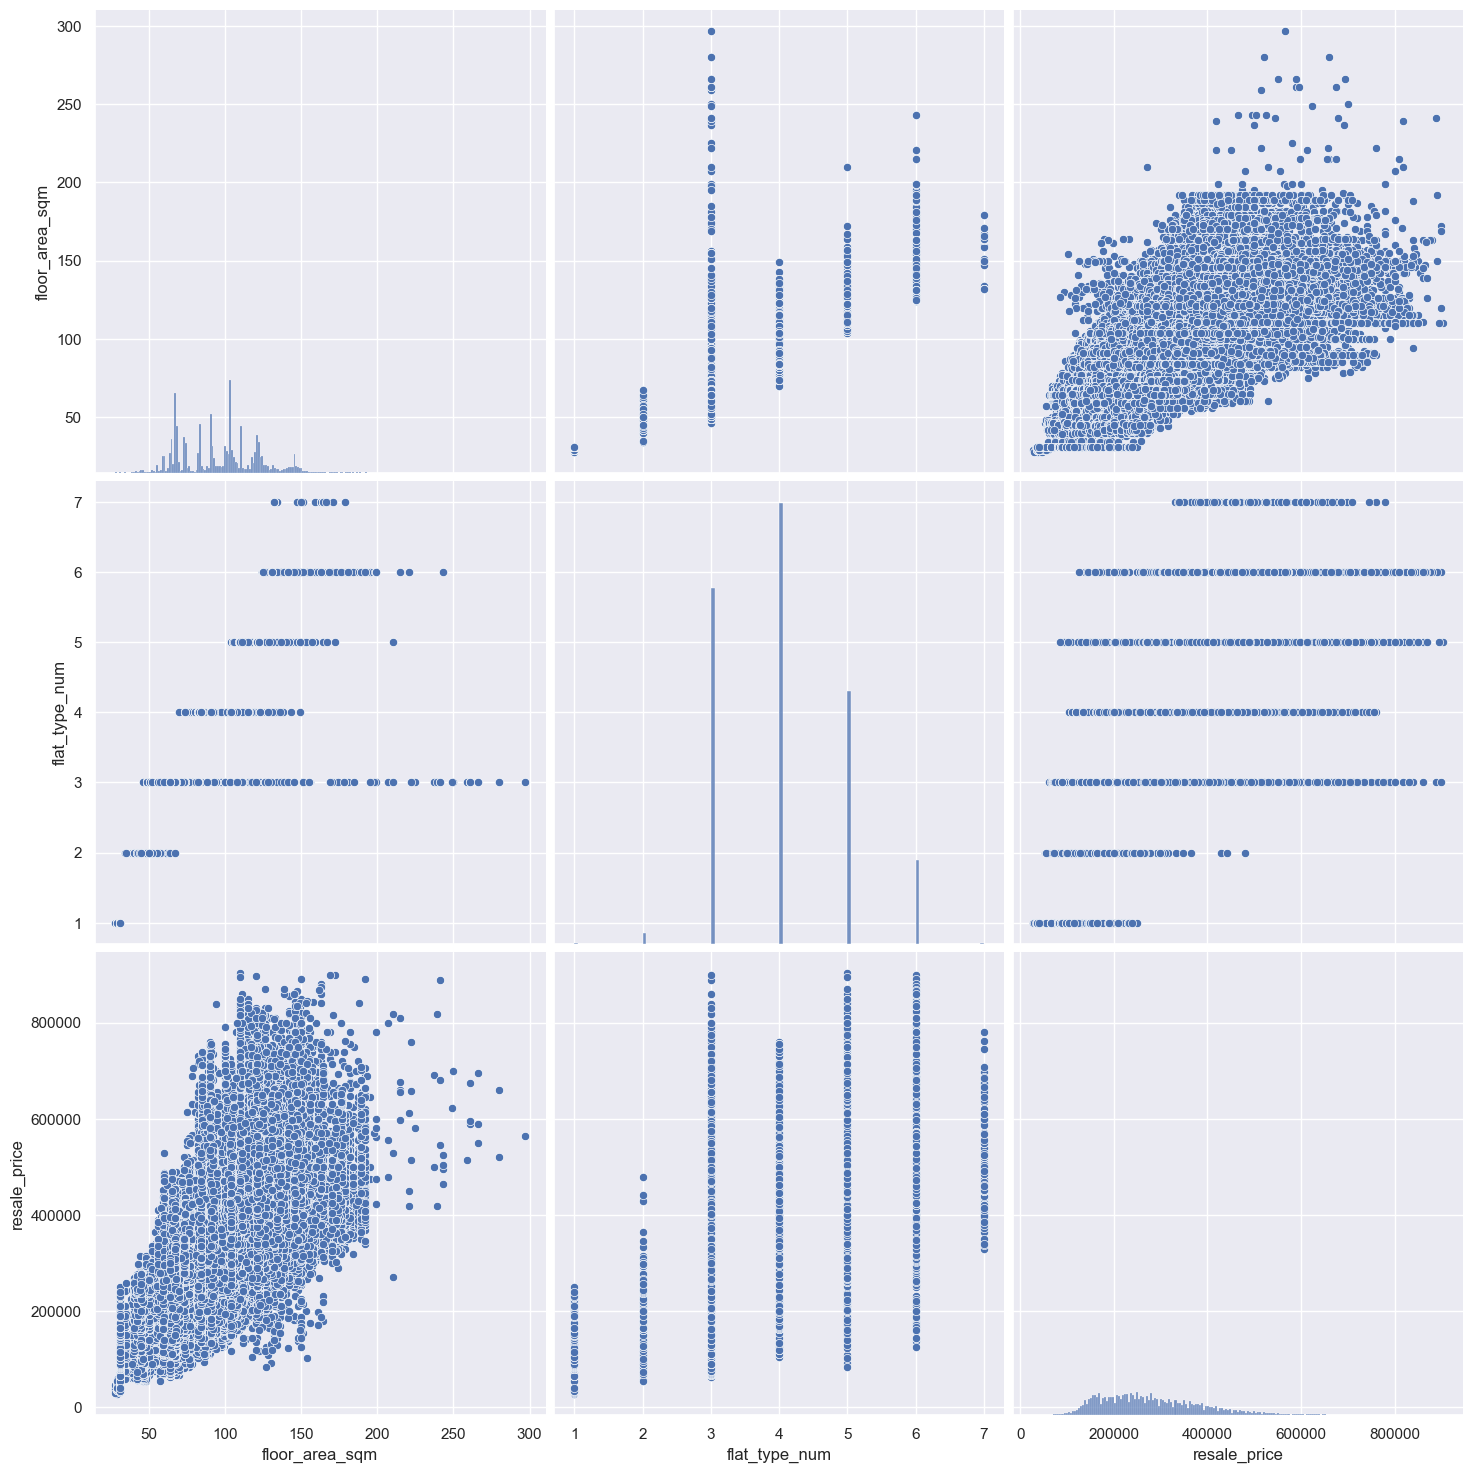

In [20]:
# Draw pairs of variables against one another
sb.pairplot(data = NumData, height = 5)

**Observation : Which variables do you think will help us predict `resale_price` in this dataset?**     

> `floor_area_sqm` : Possibly the most important variable : Highest Correlation, Strong Linearity      
> `lease_commence_date` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

Just from the above information, I would pick `floor_area_sqm` as the only top *individual* predictors, while `lease_commence_date` do not seem to play any important role in predicting resale_Price. However, we will still perform Multivariate Regression later on (`floor_area_sqm`, `lease_commence_date`) to analyse if they are a better pair to predict `resale_price` when we attempt a multivariate model.   


## Analysis of Categorical Variables

In [12]:
CatData = pd.DataFrame(data[['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']])
CatData.head()


month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

       flat_model  
0        Improved  
1        Improved  
2  New Generation  
3  New Generation  
4  New Generation

In [13]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   month         369651 non-null  object
 1   town          369651 non-null  object
 2   flat_type     369651 non-null  object
 3   block         369651 non-null  object
 4   street_name   369651 non-null  object
 5   storey_range  369651 non-null  object
 6   flat_model    369651 non-null  object
dtypes: object(7)
memory usage: 19.7+ MB


In [14]:
CatData = CatData.astype('category')

In [15]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   month         369651 non-null  category
 1   town          369651 non-null  category
 2   flat_type     369651 non-null  category
 3   block         369651 non-null  category
 4   street_name   369651 non-null  category
 5   storey_range  369651 non-null  category
 6   flat_model    369651 non-null  category
dtypes: category(7)
memory usage: 3.6 MB


In [16]:
CatData = pd.concat([CatData, data["resale_price"]], axis = 1).reindex(CatData.index)
CatData.head()

month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

       flat_model  resale_price  
0        Improved      147000.0  
1        Improved      144000.0  
2  New Generation      159000.0  
3  New Generation      167000.0  
4  New Generation      163000.0

### Check the effect of the Variables on SalePrice


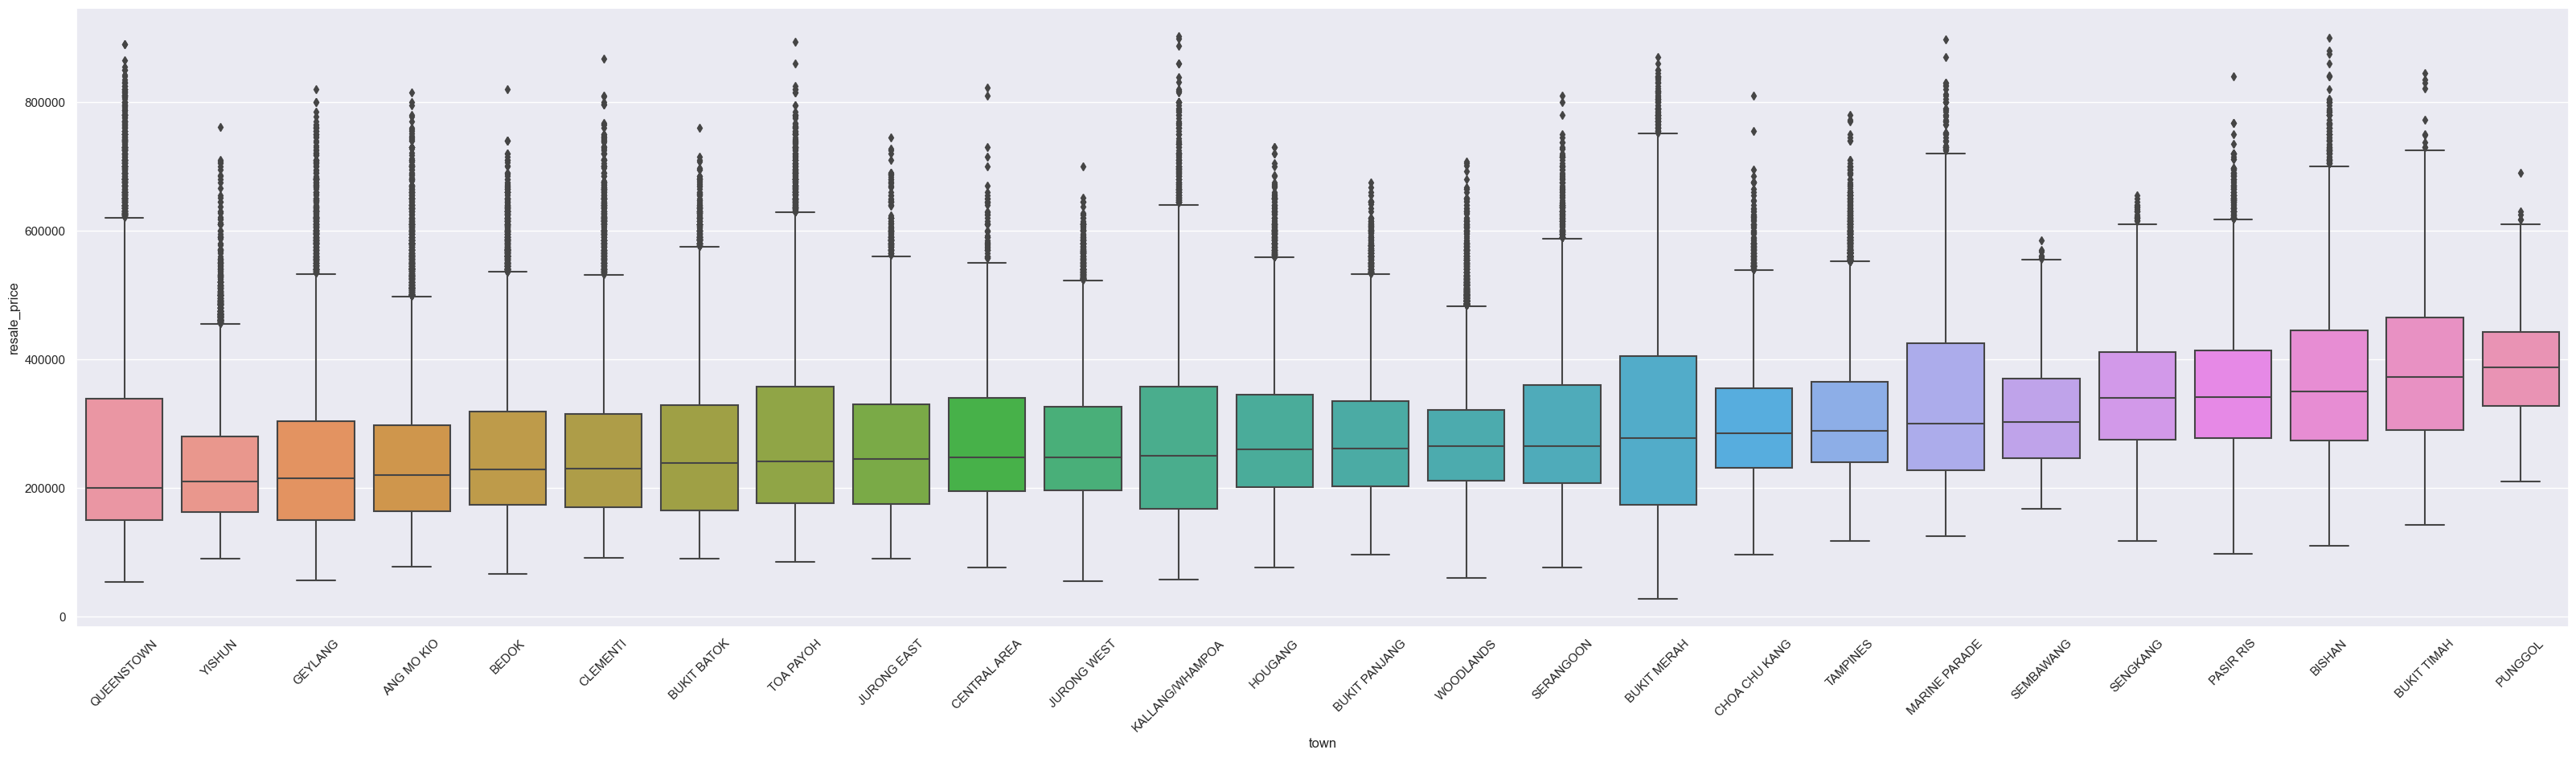

In [17]:
#f = plt.figure(figsize=(40, 10))
#sb.boxplot(x = 'town', y = 'resale_price', data = CatData)

f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'town', y = 'resale_price', data = CatData,
           order = CatData.groupby('town')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

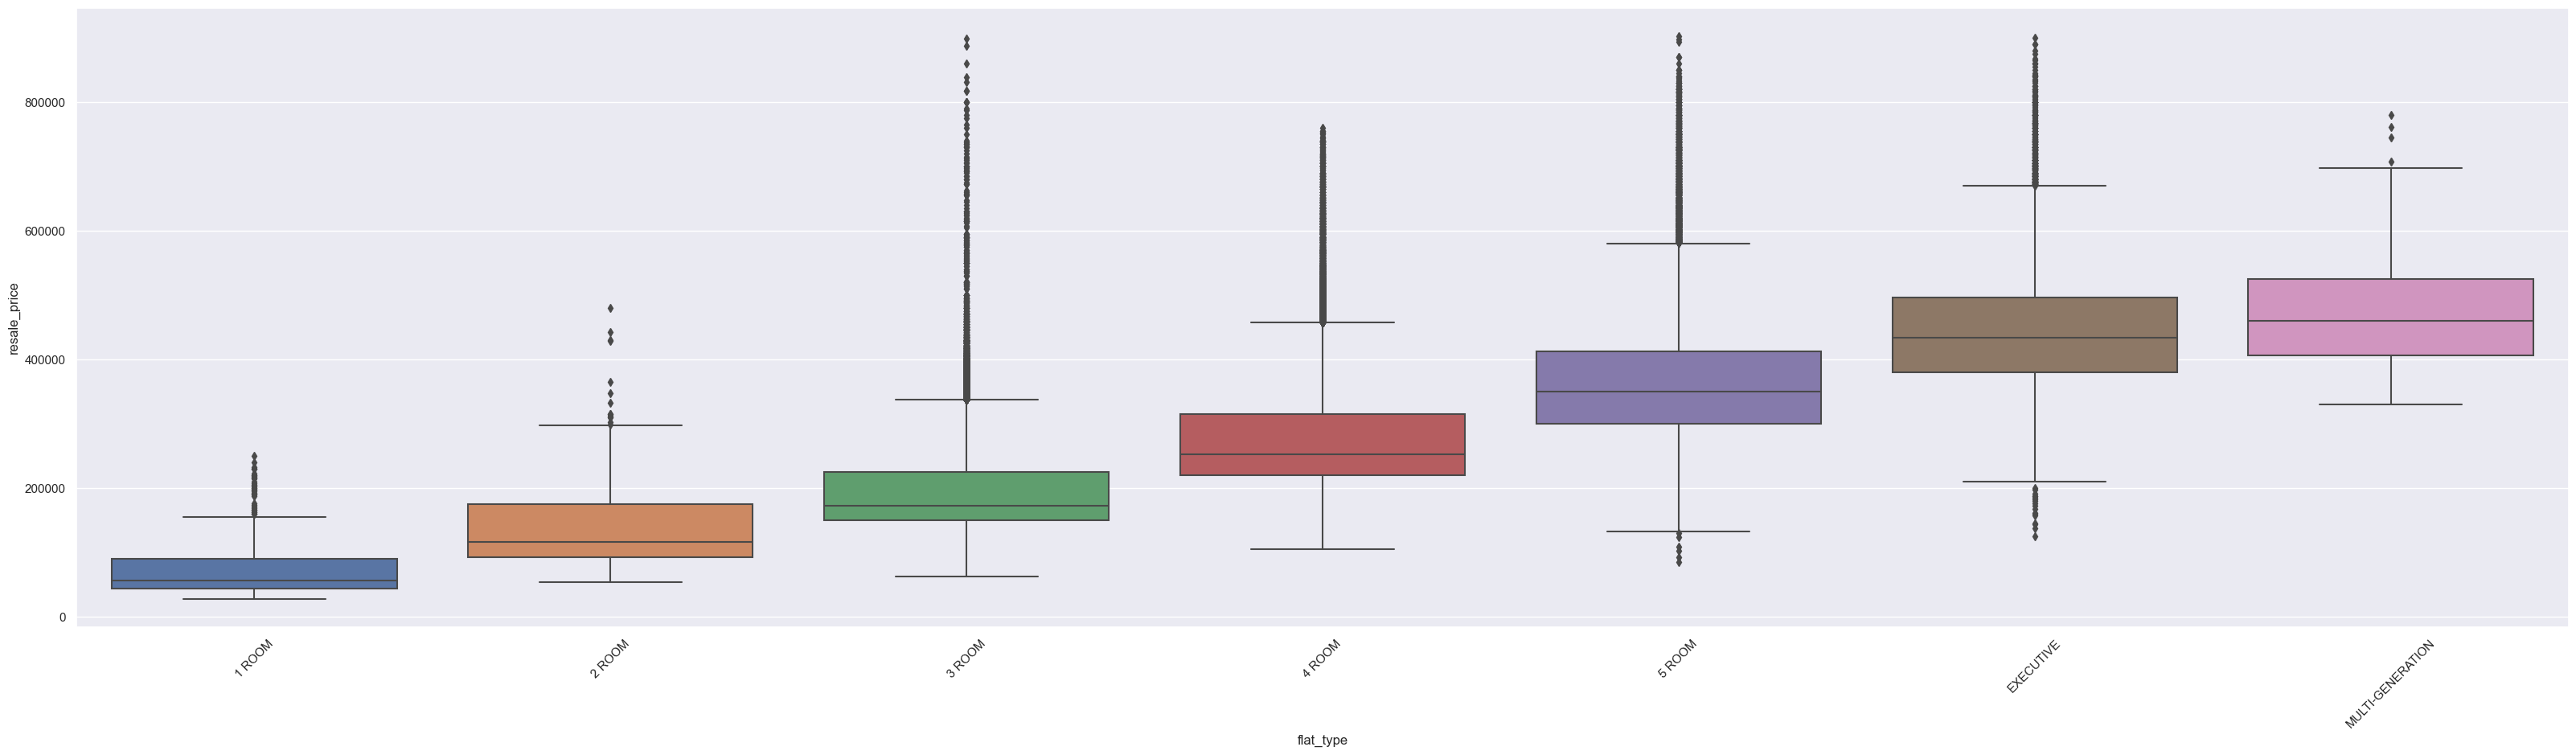

In [18]:
#f = plt.figure(figsize=(40, 10))
#sb.boxplot(x = 'flat_type', y = 'resale_price', data = CatData)

f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'flat_type', y = 'resale_price', data = CatData,
           order = CatData.groupby('flat_type')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

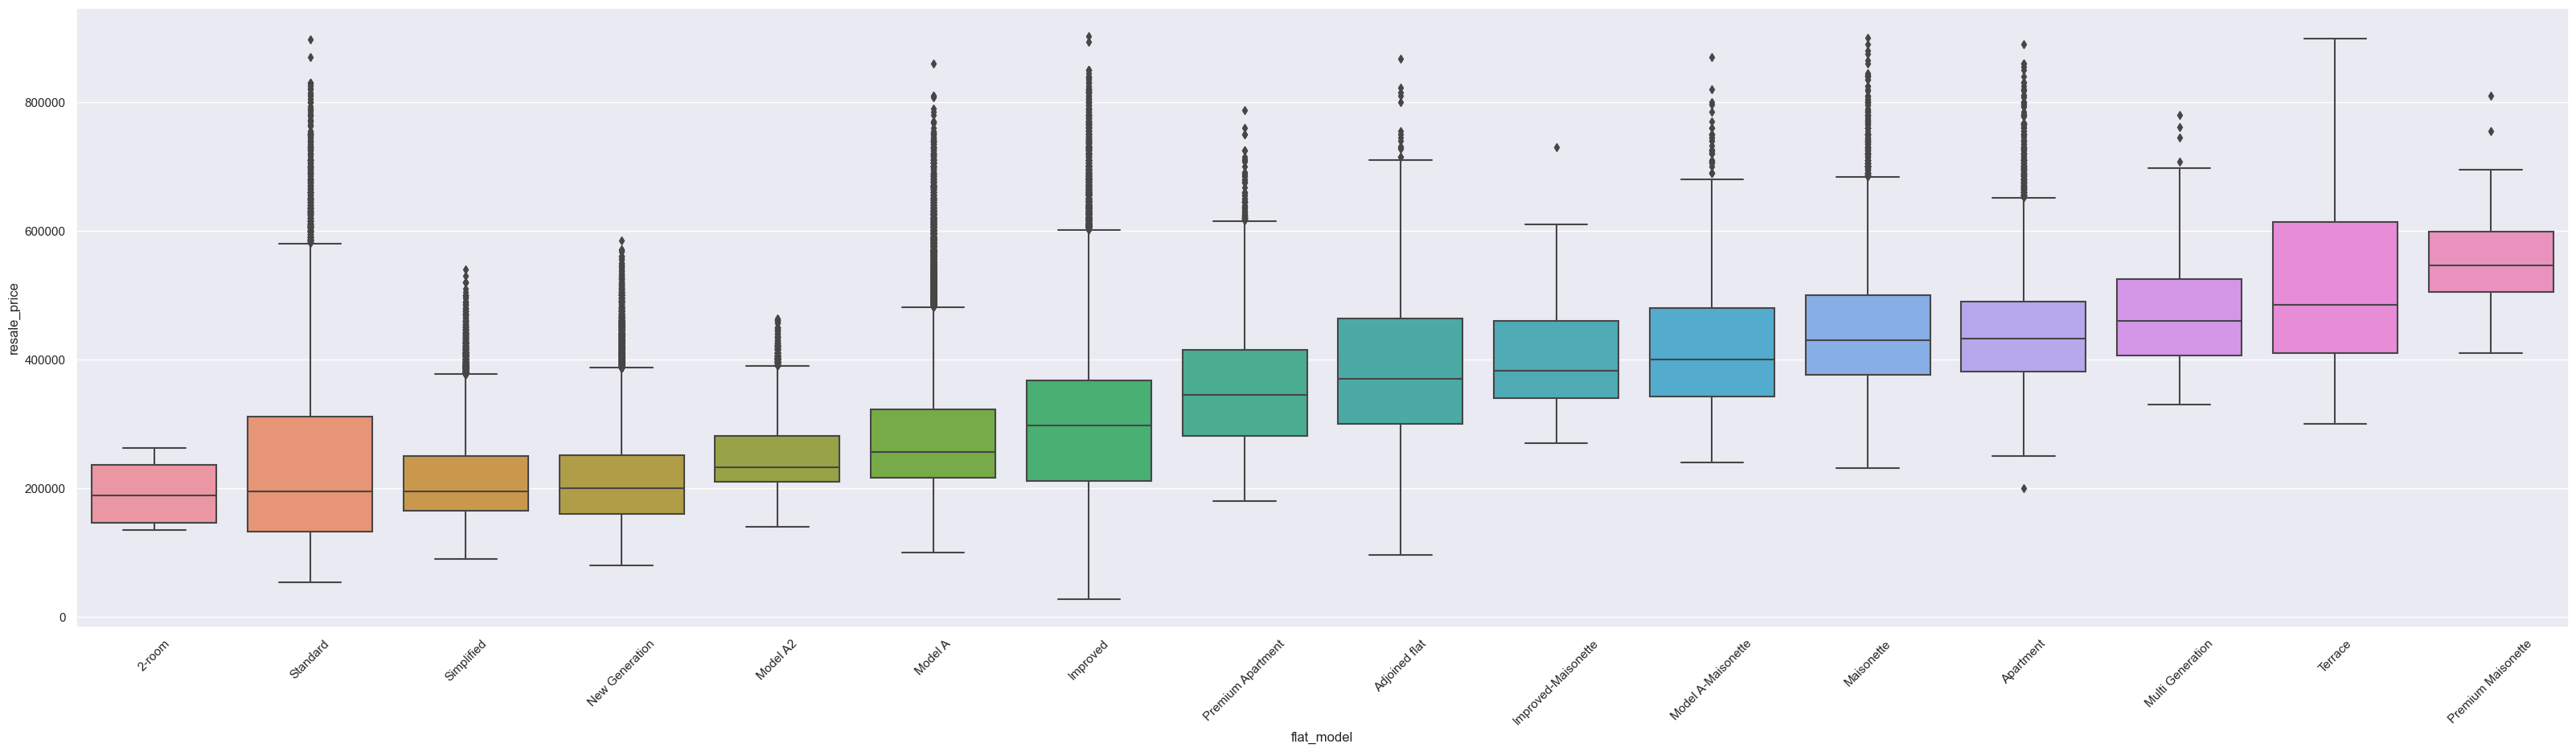

In [19]:
#f = plt.figure(figsize=(40, 10))
#sb.boxplot(x = 'flat_model', y = 'resale_price', data = CatData)

# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'flat_model', y = 'resale_price', data = CatData,
           order = CatData.groupby('flat_model')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

<AxesSubplot:xlabel='storey_range', ylabel='resale_price'>

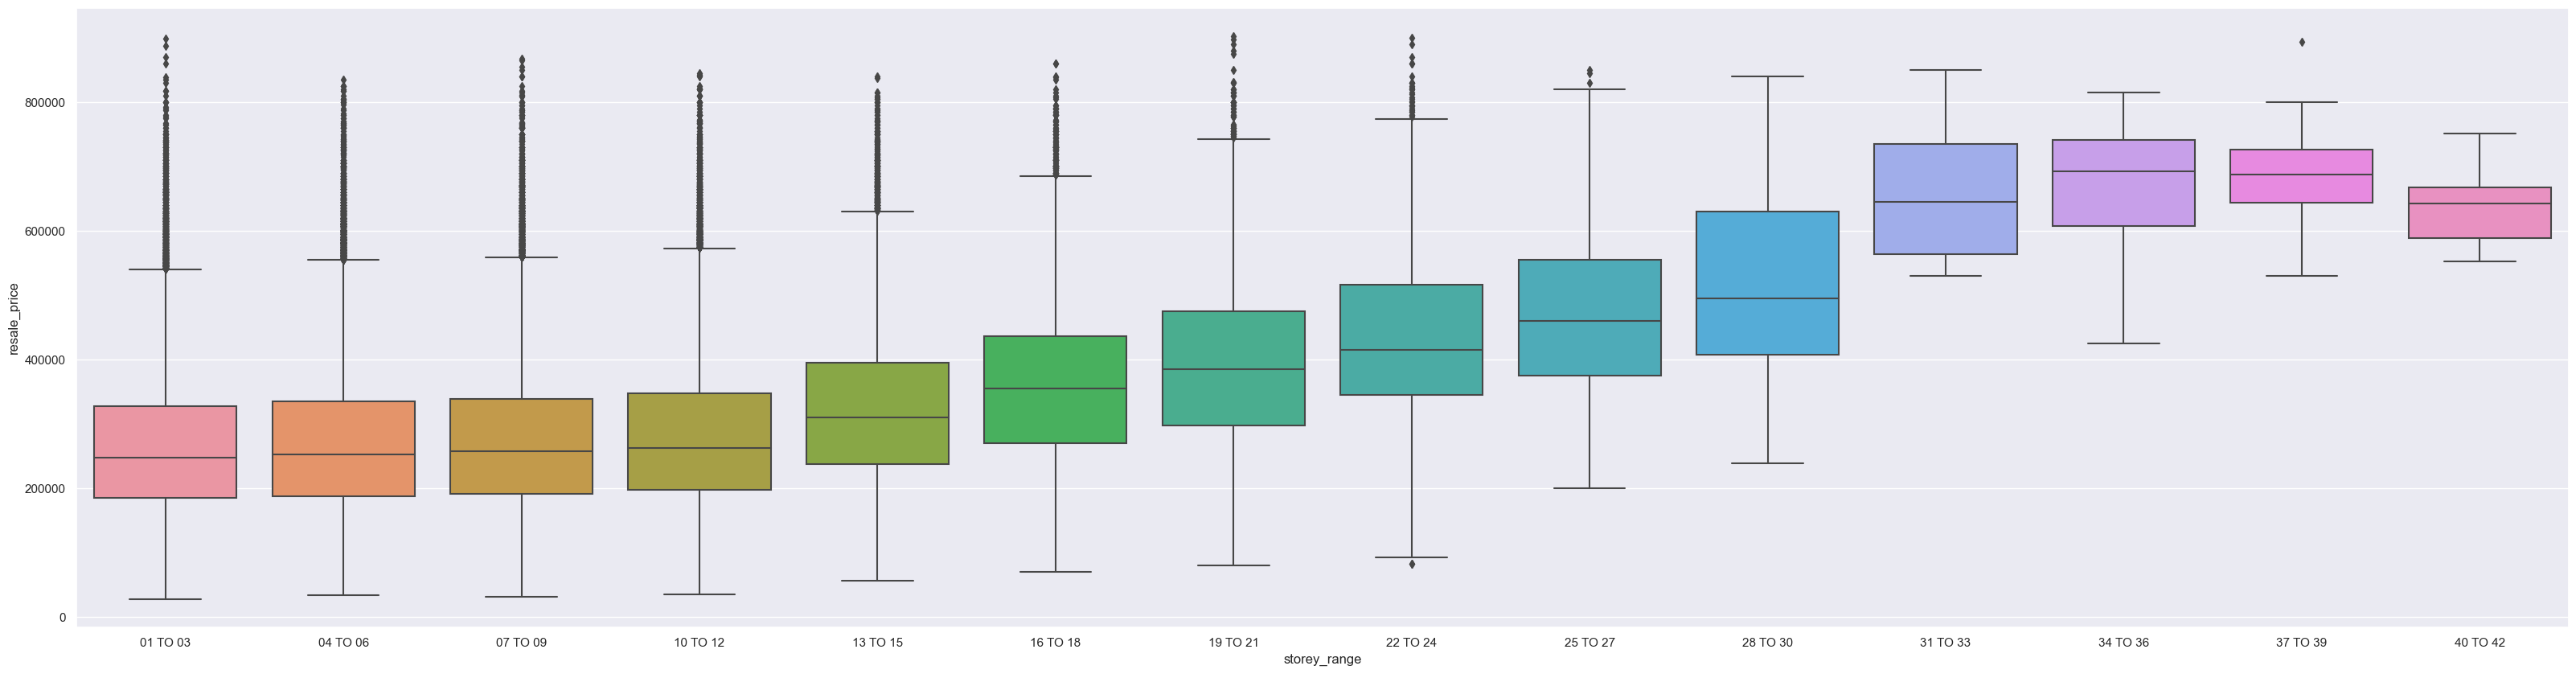

In [20]:
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'storey_range', y = 'resale_price', data = CatData)

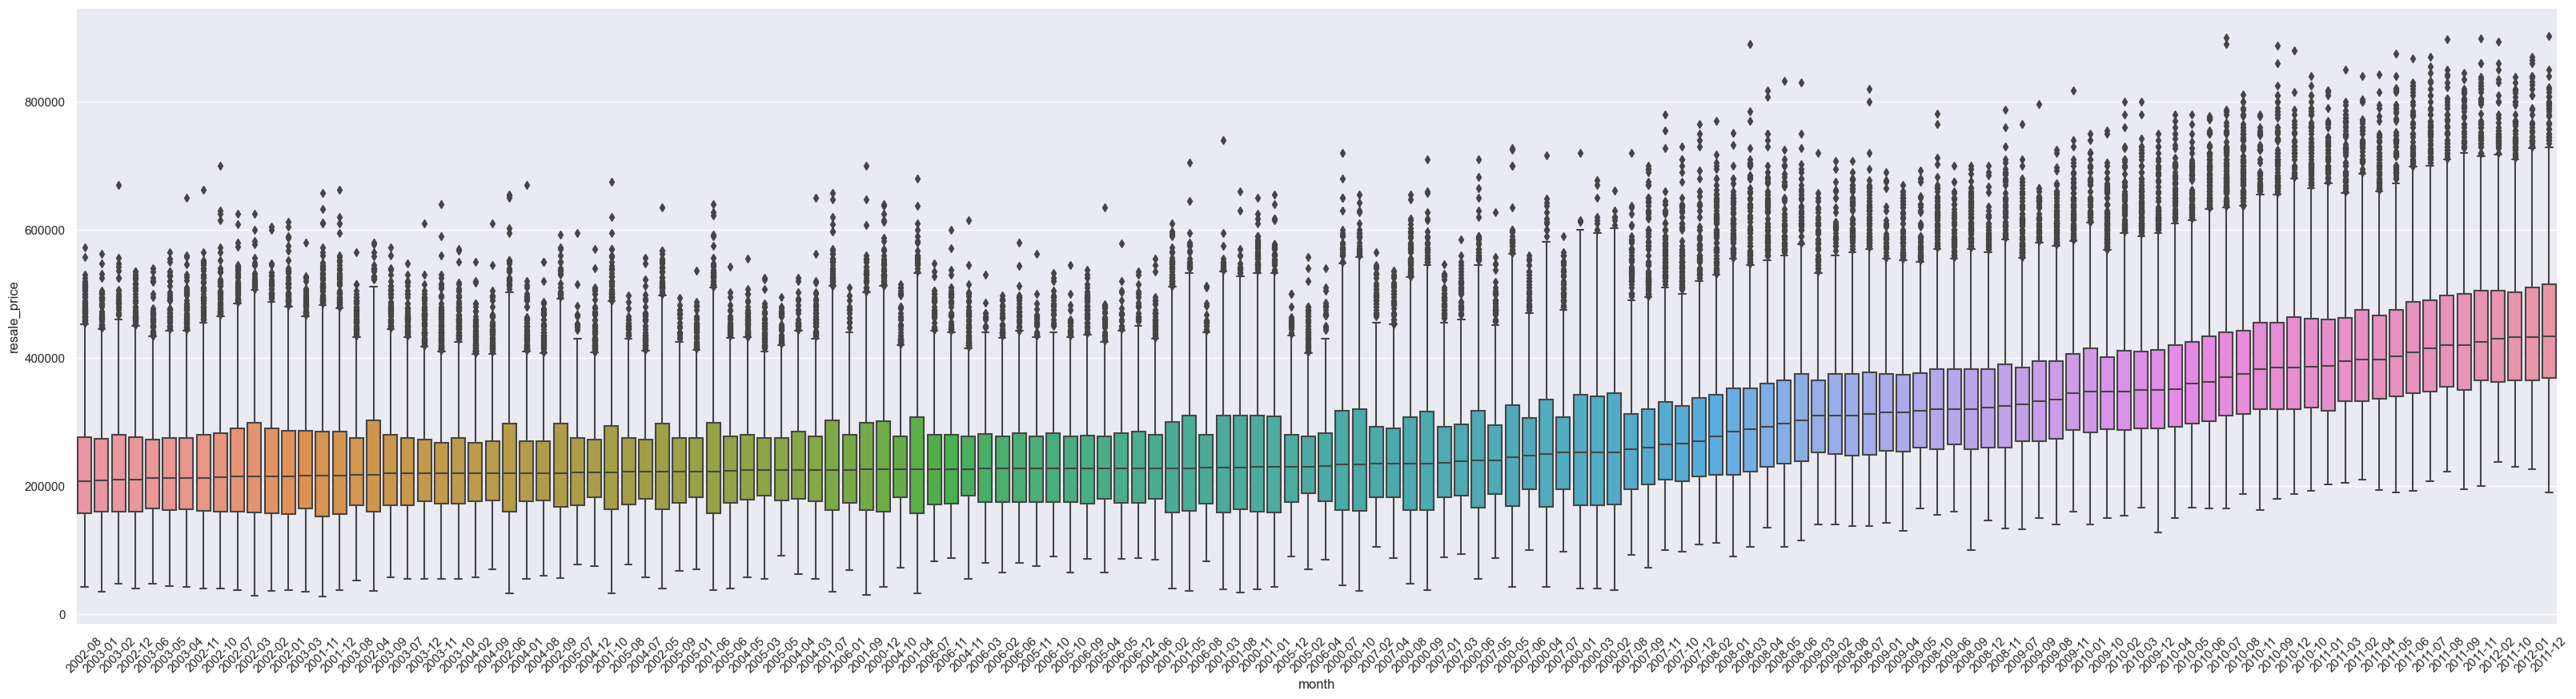

In [21]:
#f = plt.figure(figsize=(40, 10))
#sb.boxplot(x = 'month', y = 'resale_price', data = CatData)

# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'month', y = 'resale_price', data = CatData,
           order = CatData.groupby('month')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

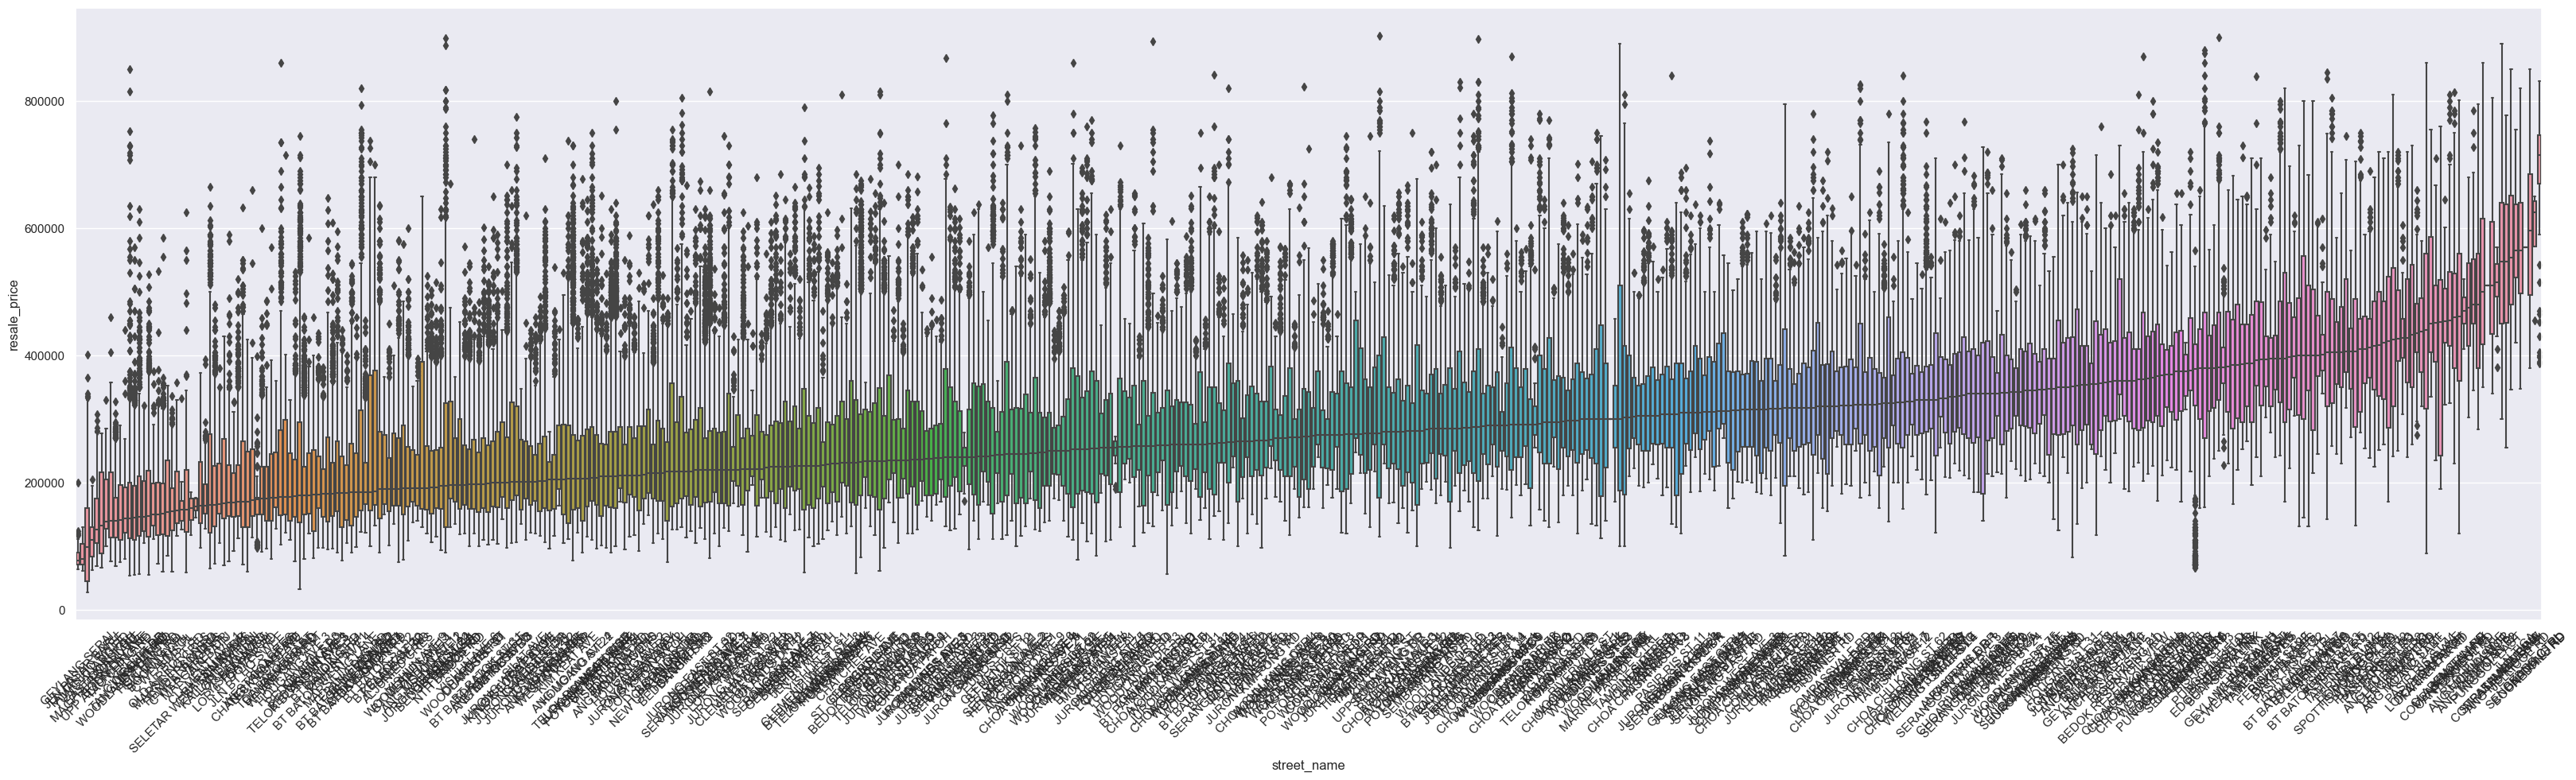

In [22]:
#f = plt.figure(figsize=(40, 10))
#sb.boxplot(x = 'street_name', y = 'resale_price', data = CatData)

# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'street_name', y = 'resale_price', data = CatData,
           order = CatData.groupby('street_name')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

**Observation : Which variables do you think will help us predict `resale_price` in this dataset?**     

> `flat_type` : Definitely the most important variable : Highest variation in `resale_price` boxplots across the categorical levels   
> `storey_range` and `flat_model` : Moderately important variables : Medium variation in `resale_price` boxplots across levels   
> `town` : Not clear if important as a variable at all : Not much variation in `resale_price` boxplots across the categorical levels   
> `month` and `street_name` : Not feasible as there are too many levels in the variable to predict `resale_price`

Just from the above information, I would pick `flat_type` and `storey_range` and `flat_model` as the more important predictors, while `flat_type` is the best amongst all. However, we will need further investigation in terms of the number of levels of categorical variables 


## REGRESSION FOR NUMERICAL DATA

## Predicting resale_price using Other Variables


In [8]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

## UNIVARIATE REGRESSION FOR DATA WITH OUTLIERS

### Comparing the Uni-Variate Linear Models

Compare and contrast the models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `resale_price` vs `floor_area_sqm` has the best Explained Variance (R^2) out of the two models ~ 0.5 and a lower MSE
* `resale_price` vs `lease_commence_date` have a lower R^2 and a higher MSE
* Naturally, the model with `floor_area_sqm` is the best one in terms of the goodness of fit on Train Set.    


* `resale_price` vs `floor_area_sqm` has the minimum MSE and highest R^2 on both the Train and Test Sets  
* `resale_price` vs `lease_commence_date` have a lower R^2 and higher MSE
* Naturally, the model with `floor_area_sqm` is the best one (lowest MSE) in terms of Test accuracy on the Test Set.    

So, overall, the predictor `floor_area_sqm` is the best amongst the two variables in predicting `resale_price`.      


 Refining the Models to Predict resale_price

#### 1) Remove outliers for floor_area_sqm and resale_price
#### 2) Remove outliers for lease_commence_date and resale_price

In [12]:
# Extract the two variables for simplicity
targetData = data[['floor_area_sqm', 'resale_price', 'lease_commence_date','flat_type_num']].copy()
# Make a clean "copy" and not just a slice of the dataset

floor_area_sqm          595
resale_price           5432
lease_commence_date       0
flat_type_num             0
dtype: int64

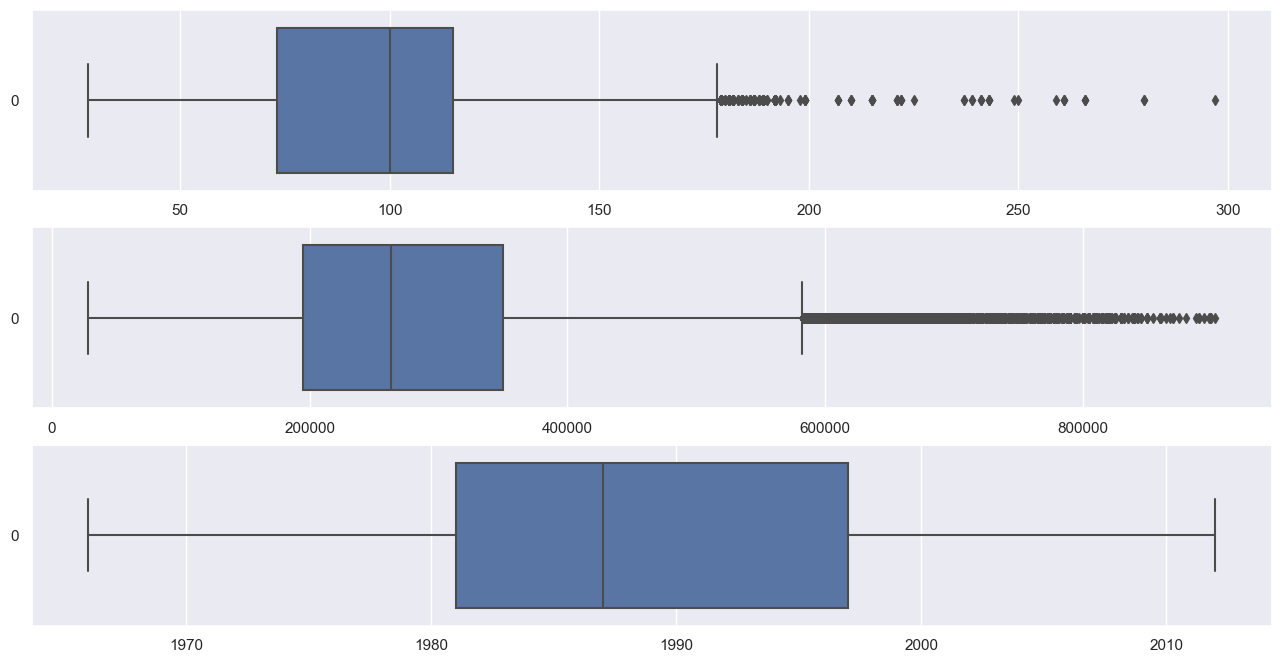

In [13]:
# Draw the boxplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

sb.boxplot(data = targetData["floor_area_sqm"], orient = "h", ax = axes[0])
sb.boxplot(data = targetData["resale_price"], orient = "h", ax = axes[1])
sb.boxplot(data = targetData["lease_commence_date"], orient = "h", ax = axes[2])

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

## LEASE COMMENCE DATE HAS NO OUTLIERS, JUST PERFORM UNIVARIATE ON BEFORE REMOVAL OF OUTLIER ON RESALE_PRICE AND AFTER REMOVAL

In [14]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

floor_area_sqm  resale_price  lease_commence_date  flat_type_num
0                False         False                False          False
1                False         False                False          False
2                False         False                False          False
3                False         False                False          False
4                False         False                False          False
...                ...           ...                  ...            ...
369646           False         False                False          False
369647           False         False                False          False
369648           False         False                False          False
369649            True          True                False          False
369650           False          True                False          False

[369651 rows x 4 columns]

In [15]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
369646    False
369647    False
369648    False
369649     True
369650     True
Length: 369651, dtype: bool

In [16]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    363711
True       5940
dtype: int64

In [17]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]

# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData

floor_area_sqm  resale_price  lease_commence_date  flat_type_num
0                 69.0      147000.0                 1986              3
1                 61.0      144000.0                 1986              3
2                 73.0      159000.0                 1976              3
3                 73.0      167000.0                 1976              3
4                 67.0      163000.0                 1976              3
...                ...           ...                  ...            ...
369644           121.0      465000.0                 1985              5
369645           121.0      503000.0                 1985              5
369646           121.0      476888.0                 1985              5
369647           122.0      490000.0                 1986              5
369648           122.0      488000.0                 1988              5

[363711 rows x 4 columns]

#### Check : Did outlier removal improve our model?

Let's fit a linear regression model at this stage to check if removing outliers helped us at all.

## CASE 1 BEFORE AND AFTER REMOVAL OF OUTLIERS FOR floor_area_sqm and resale_price

Intercept 	: b =  [-60218.69597518]
Coefficients 	: a =  [[84599.77914509]]


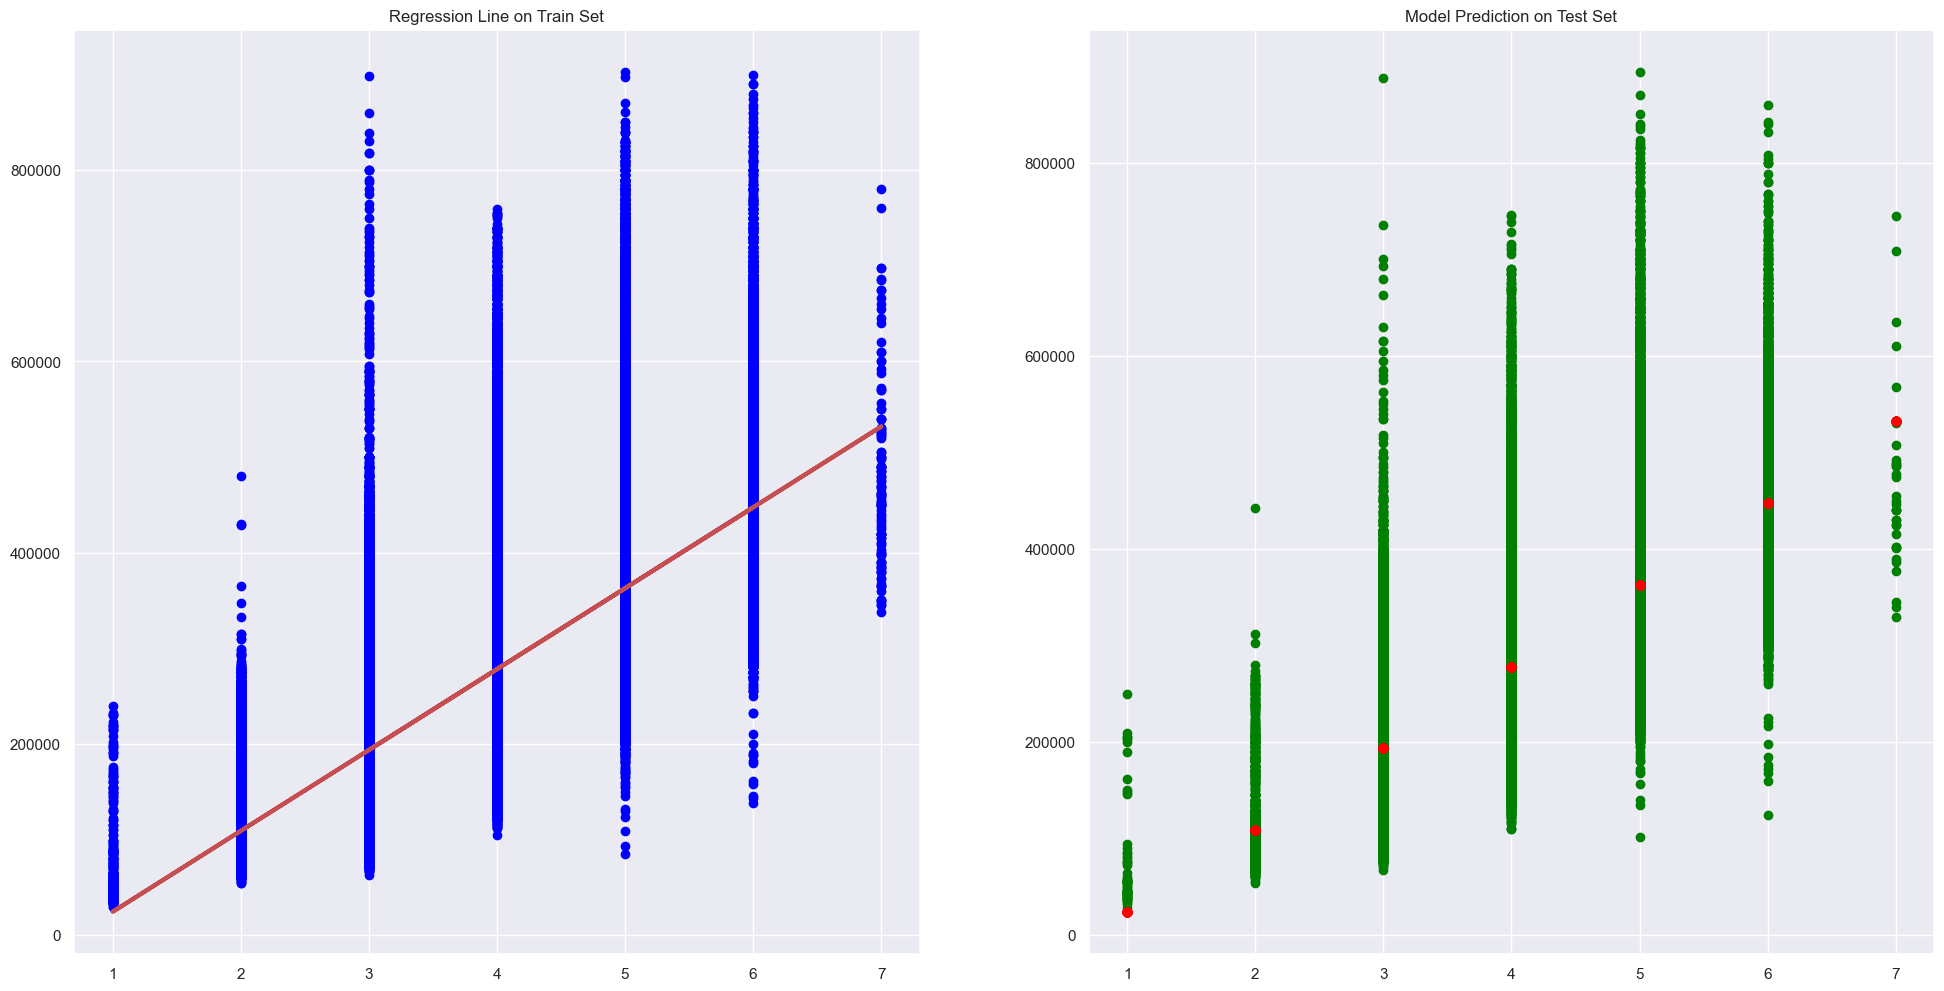

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4977703045571362
Mean Squared Error (MSE) 	: 6307772532.476063

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4972113243777968
Mean Squared Error (MSE) 	: 6342657411.086951



In [10]:
univariateLinearRegression(Xvar = "flat_type_num", yvar = "resale_price", df = data) #before removal of outliers

Intercept 	: b =  [-229.86542189]
Coefficients 	: a =  [[2873.03069279]]


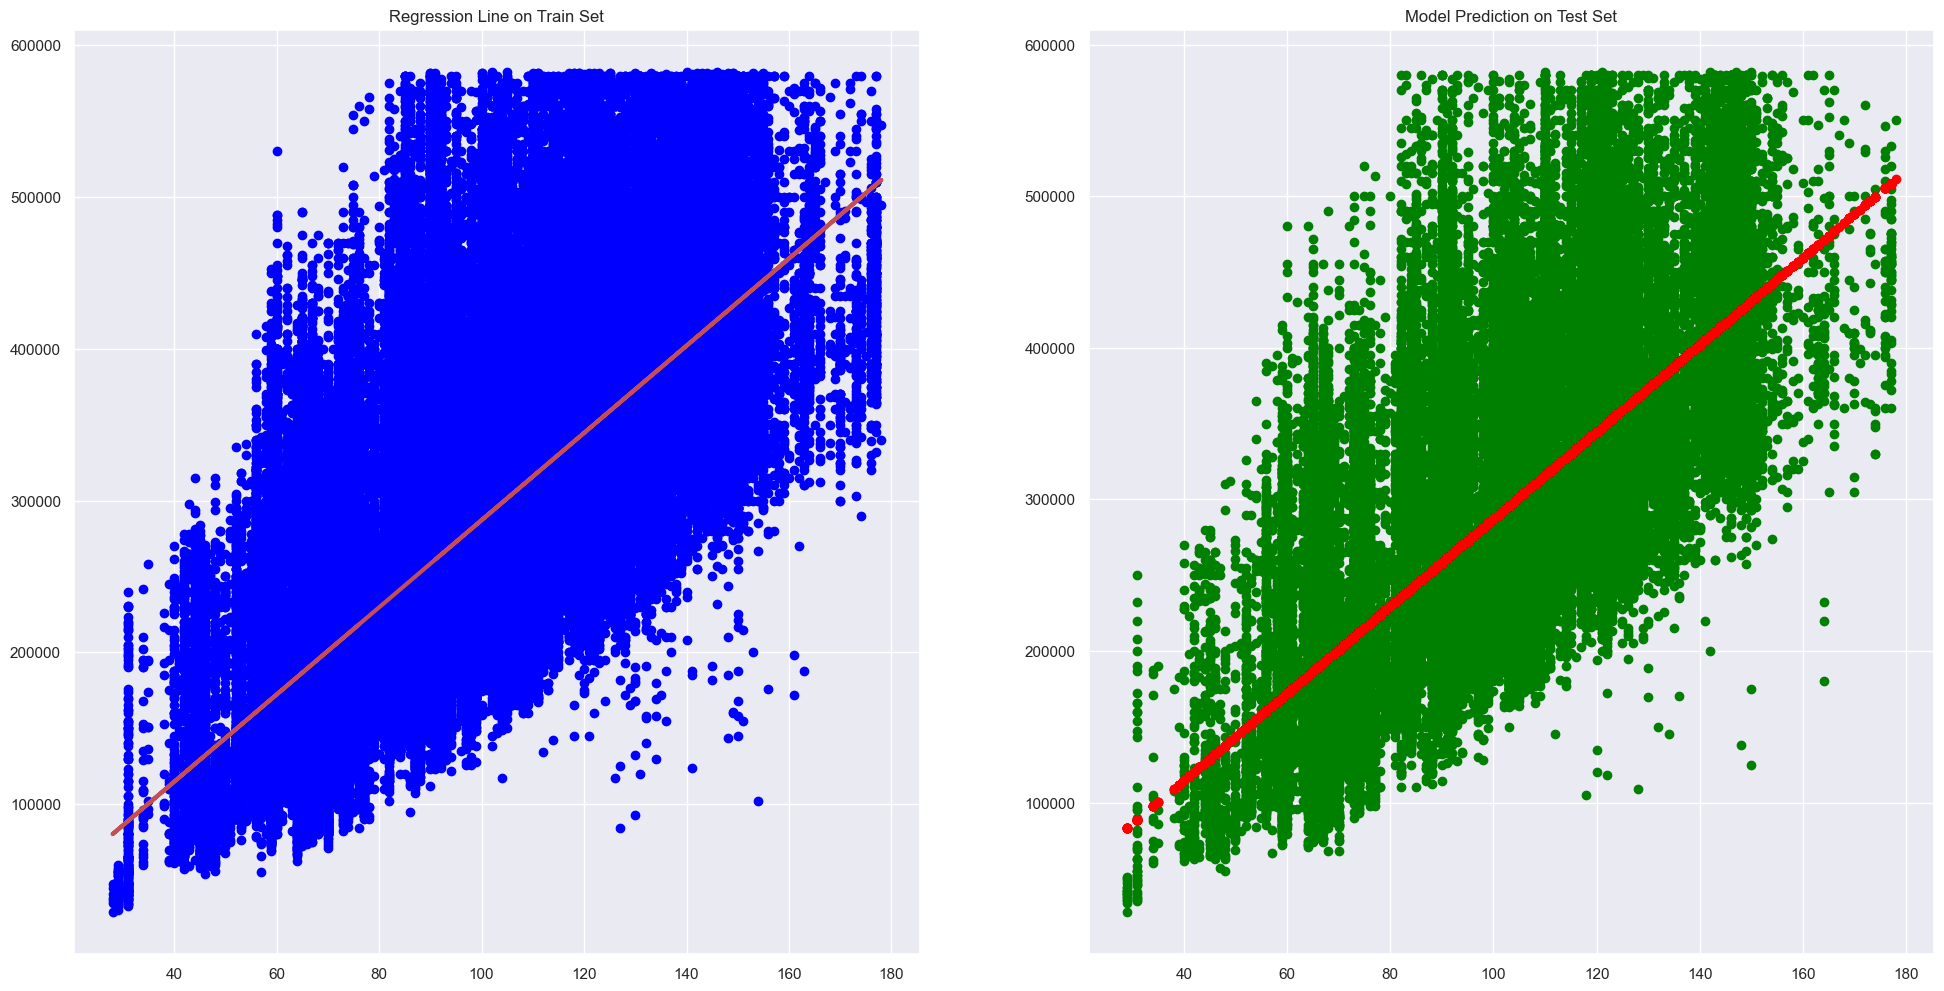

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49233132605373064
Mean Squared Error (MSE) 	: 5397085438.299111

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.49169645599716894
Mean Squared Error (MSE) 	: 5391050331.486952



In [91]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "resale_price", df = targetData) #after removal of outliers

## CASE 2 BEFORE AND AFTER REMOVAL OF OUTLIERS FOR floor_area_sqm and resale_price


Intercept 	: b =  [-10408296.33140551]
Coefficients 	: a =  [[5377.0464436]]


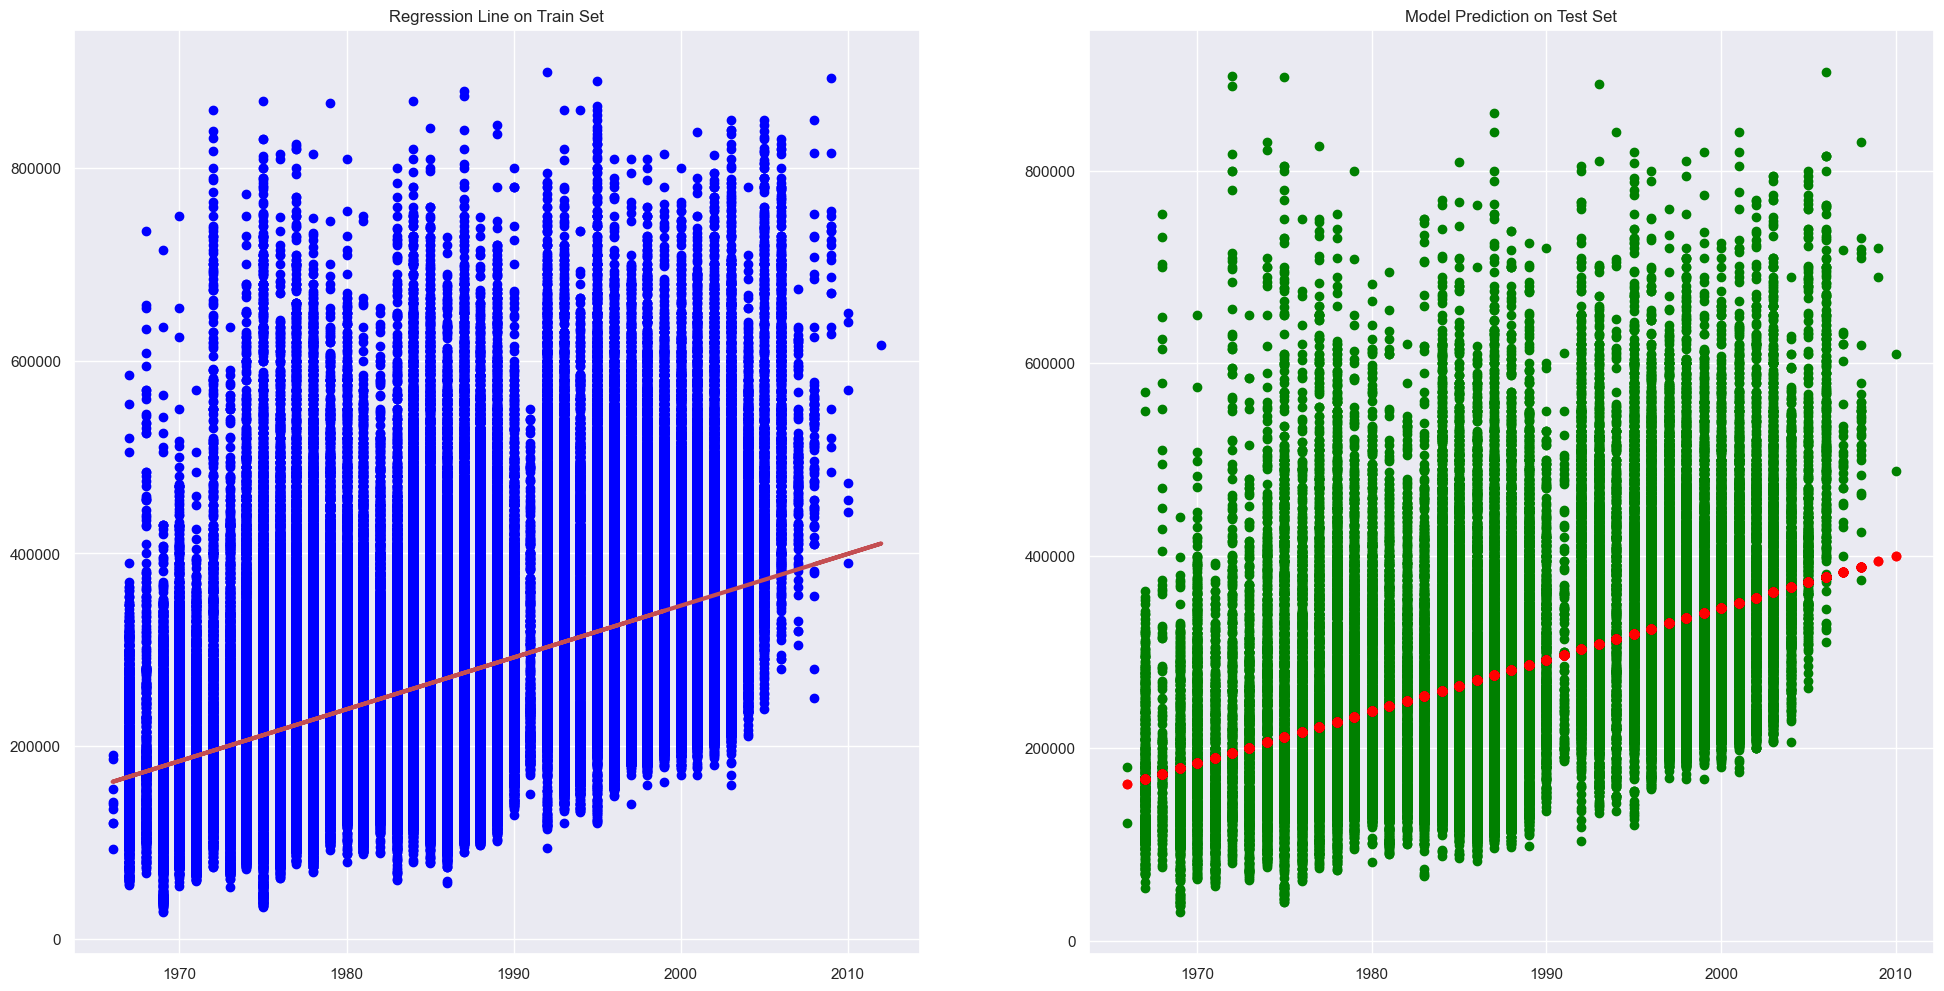

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19137207845751192
Mean Squared Error (MSE) 	: 10147582869.864475

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.190526125385454
Mean Squared Error (MSE) 	: 10245112854.91535



In [92]:
univariateLinearRegression(Xvar = "lease_commence_date", yvar = "resale_price", df = data) #before removal of outliers

Intercept 	: b =  [-45249.09316173]
Coefficients 	: a =  [[79859.18158832]]


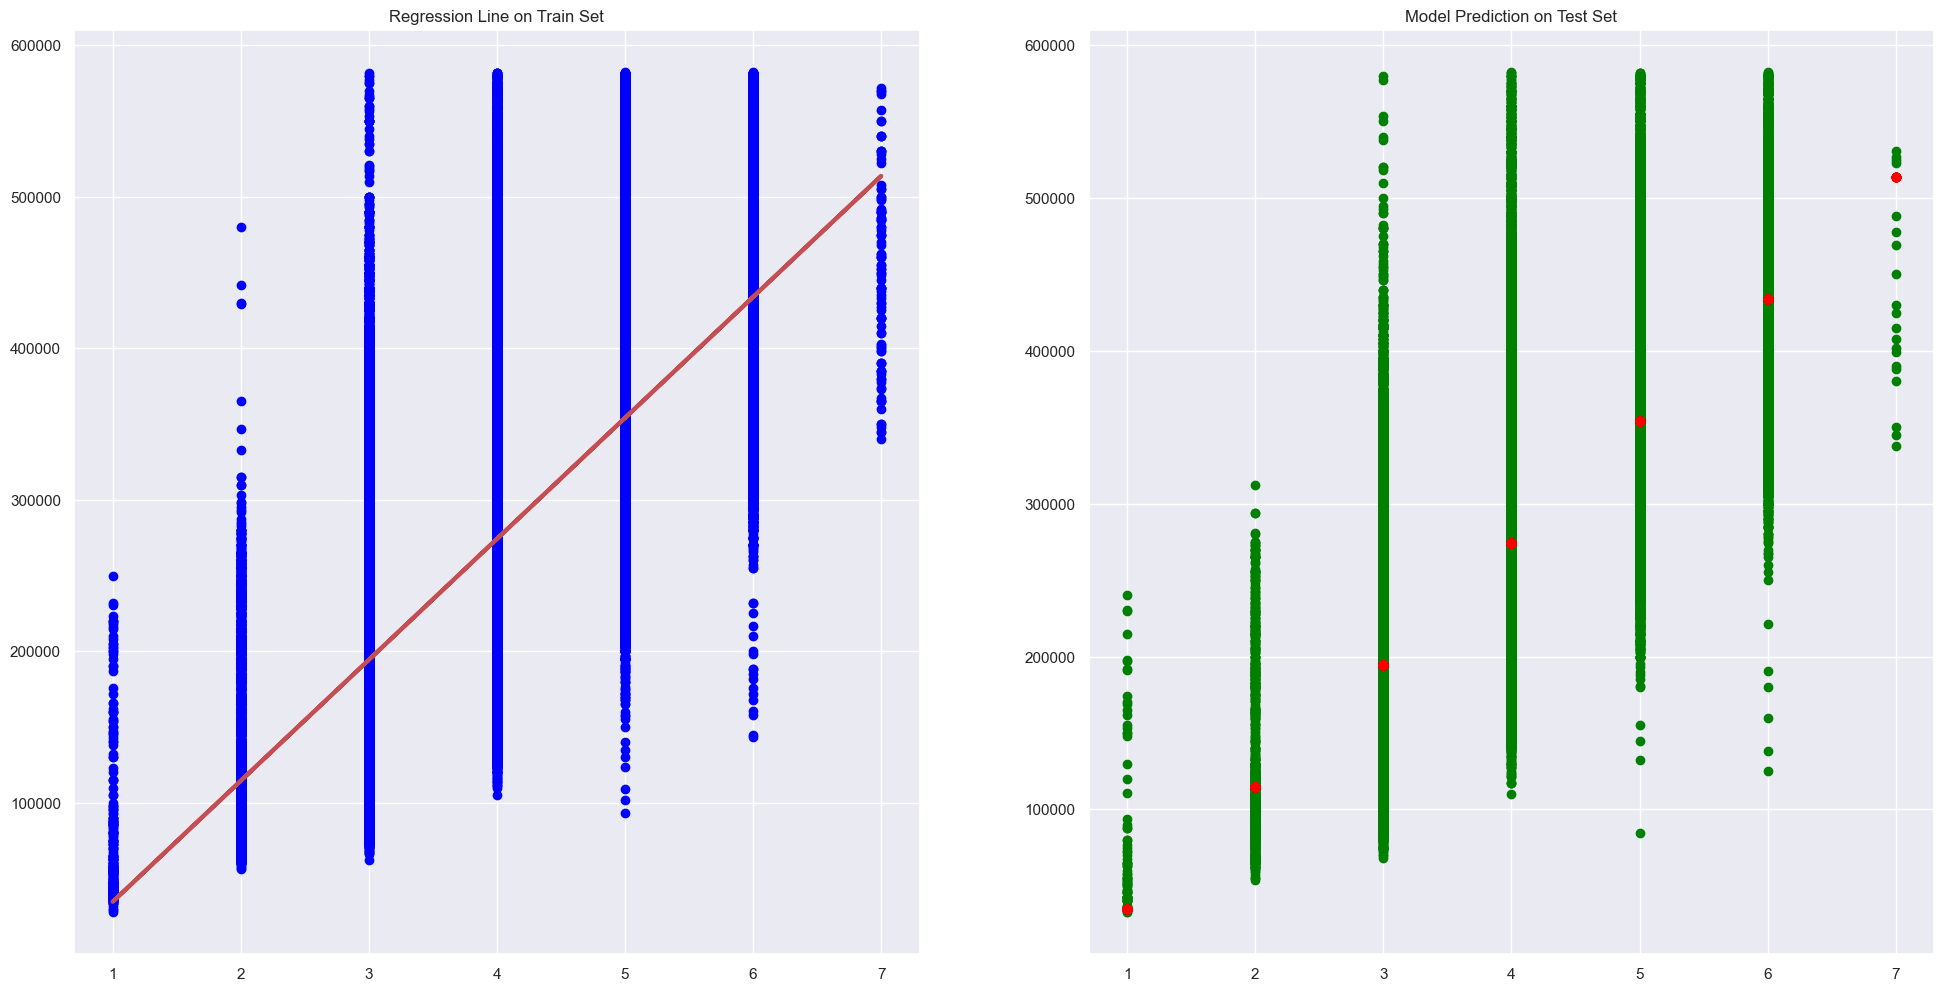

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5119049314349688
Mean Squared Error (MSE) 	: 5184296071.729886

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5127366924659355
Mean Squared Error (MSE) 	: 5186780386.259691



In [18]:
univariateLinearRegression(Xvar = "flat_type_num", yvar = "resale_price", df = targetData) #after removal of outliers

**Observation:** MSE improved a lot for the cleaned (outlier removed) data, but the R^2 has not changed a lot. That means we are reducing both MSE and VAR($y$) in the dataset (and consequently in the train set) as we remove the outliers. So, MSE improves a lot, but R^2 remains similar. This is actually an improvement, as our final prediction accuracy and confidence intervals depend on the MSE of our model on test set.

### Comparing the Uni-Variate Linear Models

Compare and contrast the models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `resale_price` vs `floor_area_sqm` has the best Explained Variance (R^2) out of the two models ~ 0.5 and a lower MSE
* `resale_price` vs `lease_commence_date` have a lower R^2 and a higher MSE
* Naturally, the model with `floor_area_sqm` is the best one in terms of the goodness of fit on Train Set.    


* `resale_price` vs `floor_area_sqm` has the minimum MSE and highest R^2 on both the Train and Test Sets  
* `resale_price` vs `lease_commence_date` have a lower R^2 and higher MSE
* Naturally, the model with `floor_area_sqm` is the best one (lowest MSE) in terms of Test accuracy on the Test Set.    

So, overall, the predictor `floor_area_sqm` is the best amongst the two variables in predicting `resale_price`.      


## PERFORM TRANSFORMATION FOR SKEW

In [74]:
# We start with the clean outlier-removed dataset
targetData.skew()

floor_area_sqm         0.257178
resale_price           0.562052
lease_commence_date   -0.105744
dtype: float64

In [76]:
# What was the skew in the original data we had?
data[["floor_area_sqm","resale_price","lease_commence_date"]].skew()

floor_area_sqm         0.310634
resale_price           0.868381
lease_commence_date   -0.108738
dtype: float64

Wow! It seems that removing outliers has already helped us a lot with the skewness in the data.     
- Skewness between -0.5 to 0.5 is considered more or less *symmetric* (no need to transform)
- Skewness between -1.0 to -0.5 or 0.5 to 1.0 is *moderately skewed* (we may try a transform)
- Skewness below -1.0 or above 1.0 is *highly skewed* (we should try transforming the response)

In this case, we may try fixing the *moderate skewness* of `resale_price` in the cleaned dataset.     
No need to transform `floor_area_sqm` as it has *low skewness* and it is not the response variable.

In [78]:
# Make a new column for the transformed response variable
# Go ahead and try out a couple of different transforms
targetData['logresalePrice'] = np.log(targetData['resale_price'])
targetData['sqrtresalePrice'] = np.sqrt(targetData['resale_price'])

In [79]:
# Check the skewness of the transformed variables
targetData.skew()

floor_area_sqm         0.257178
resale_price           0.562052
lease_commence_date   -0.105744
logresalePrice        -0.256347
sqrtresalePrice        0.176969
dtype: float64

Ok, both the transformations reduced skewness to the acceptable margin (-0.5 to 0.5).     
I will use `sqrtresalePrice` for the fit.

Intercept 	: b =  [248.42448303]
Coefficients 	: a =  [[2.78571872]]


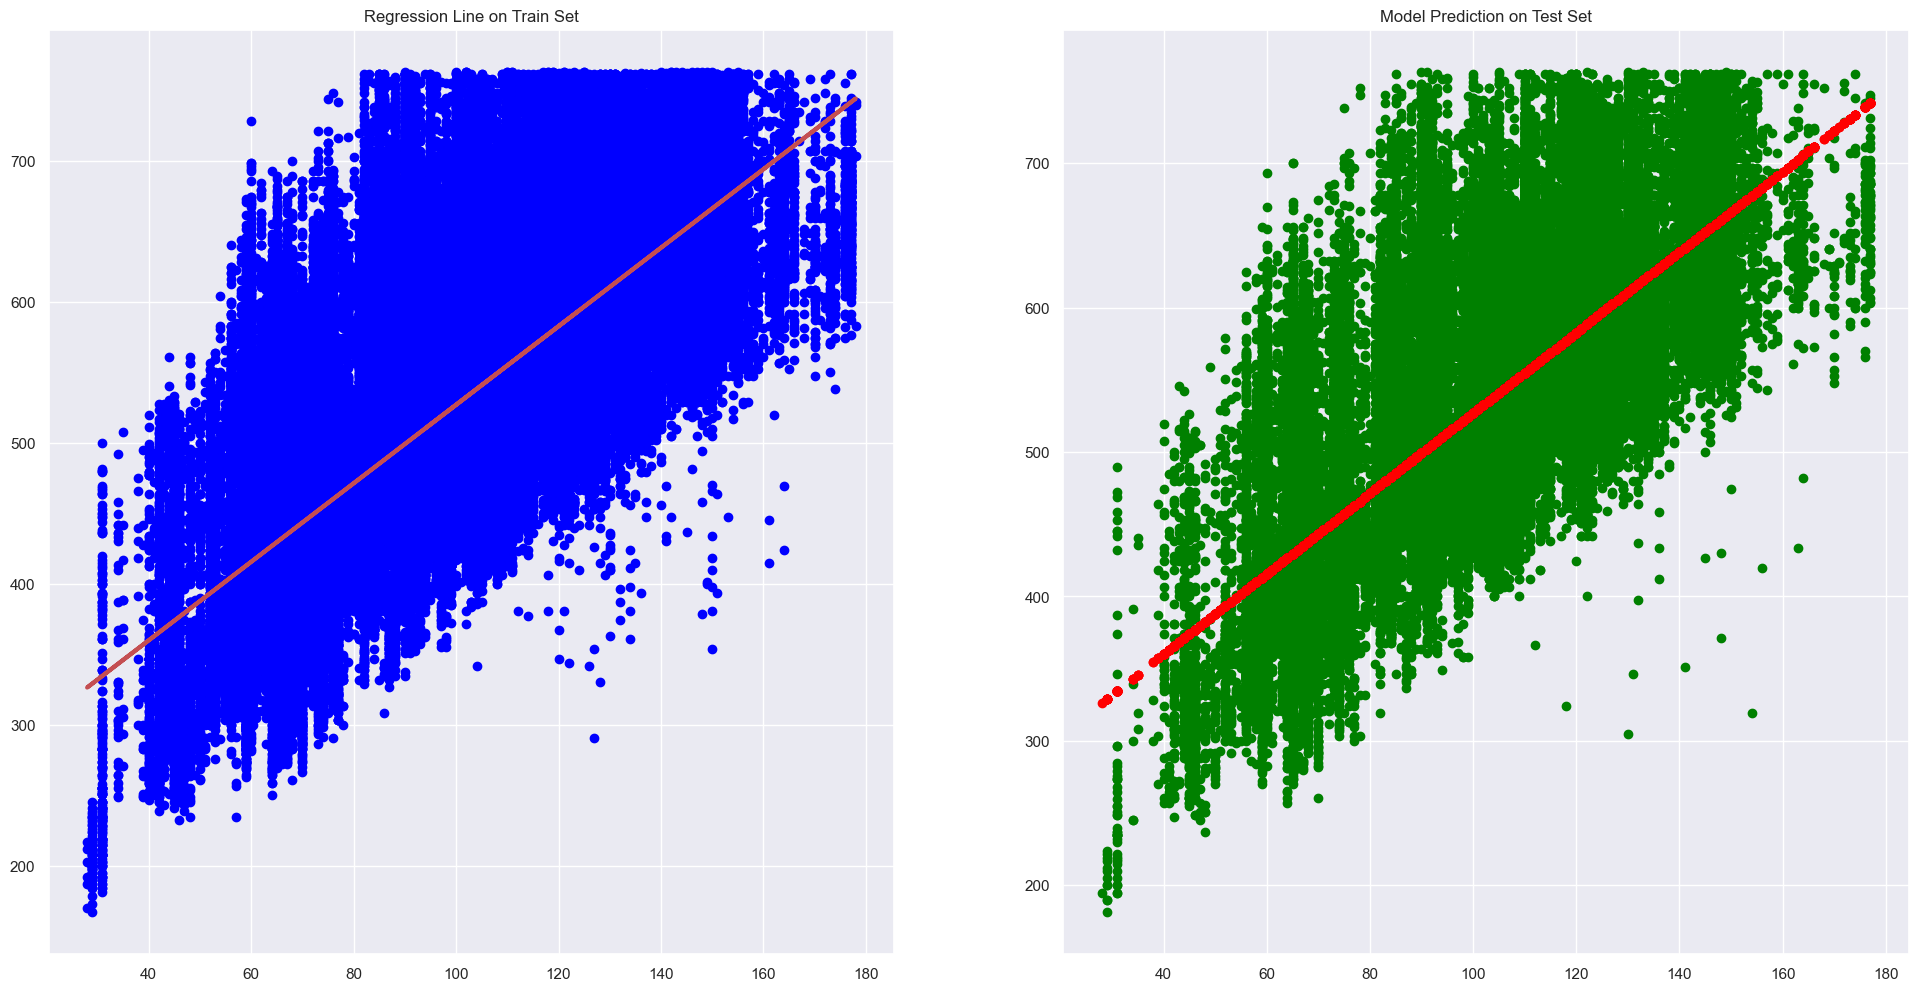

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5129699209053724
Mean Squared Error (MSE) 	: 4661.502790325095

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4603.561970428966



In [42]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "sqrtresalePrice", df = targetData)

Intercept 	: b =  [-9576.46245799]
Coefficients 	: a =  [[5.07681627]]


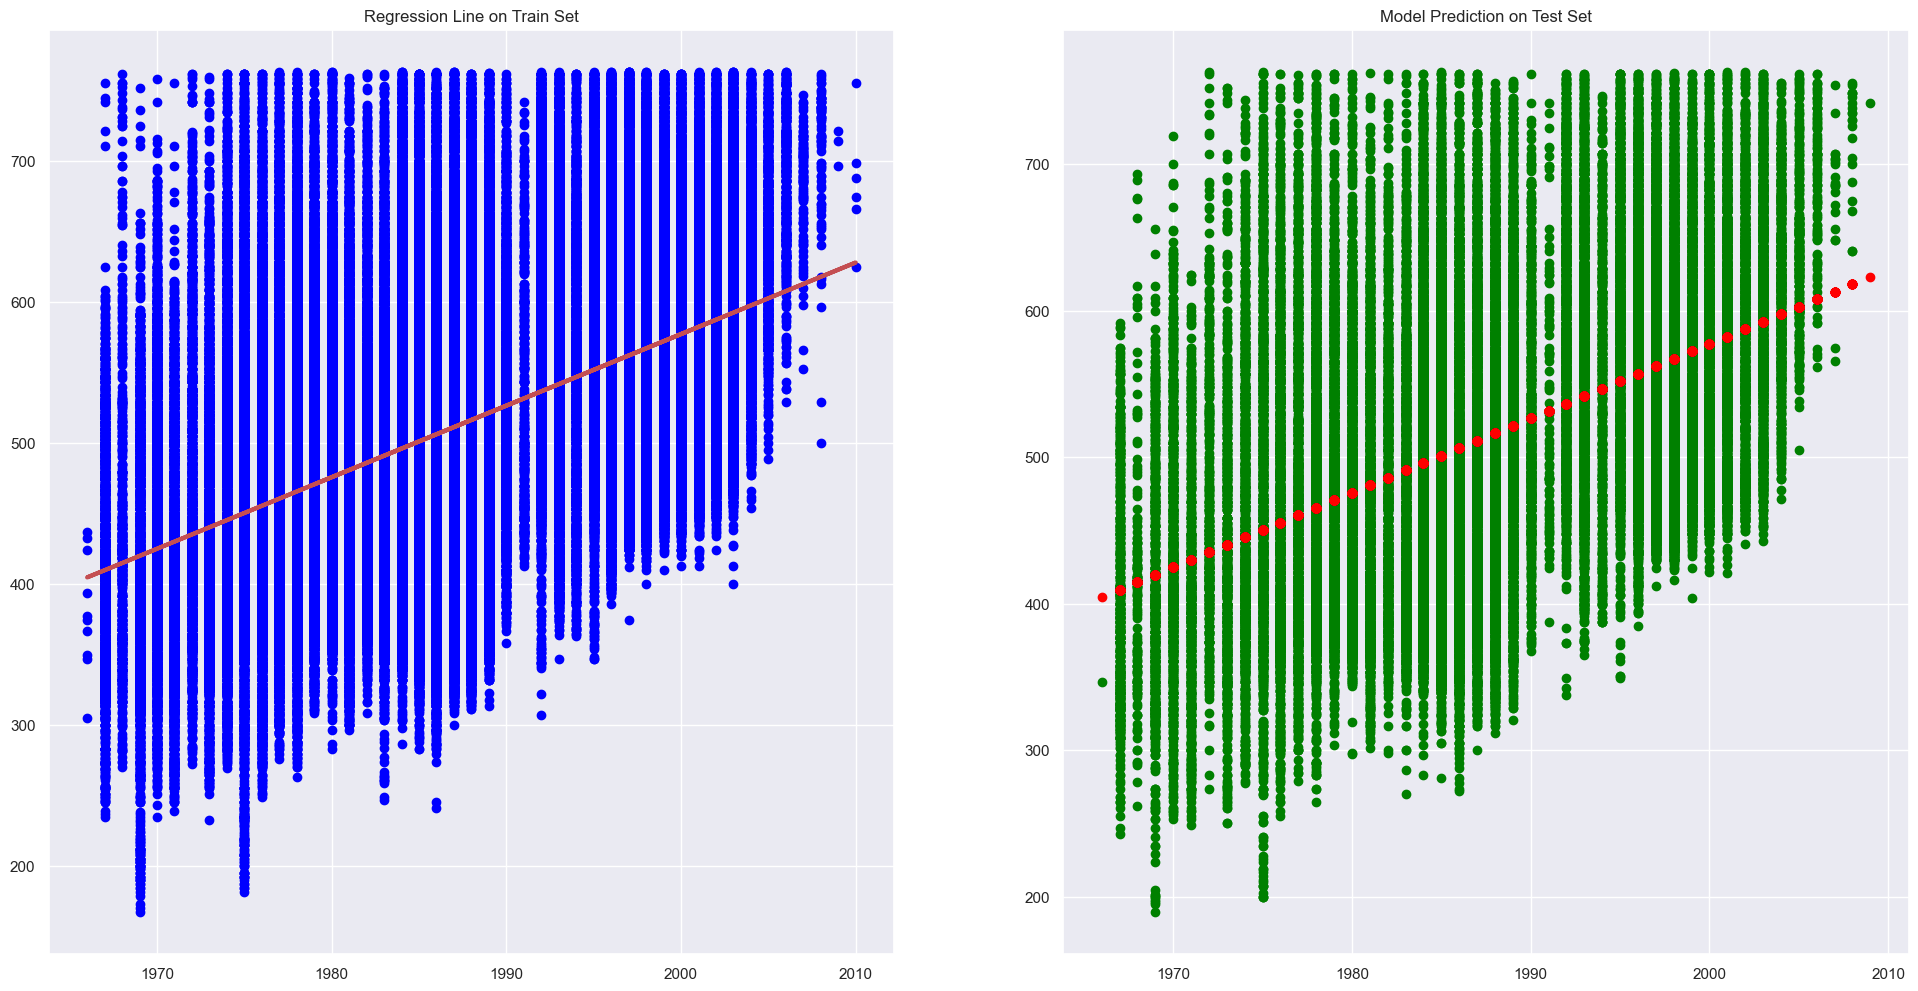

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22347805454994196
Mean Squared Error (MSE) 	: 7410.667427710983

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 7423.795110897022



In [80]:
univariateLinearRegression(Xvar = "lease_commence_date", yvar = "sqrtresalePrice", df = targetData)

**Observation:**  R^2 seems to be same once again, while the MSE seems to have improved (reduced) a lot. Reducing MSE is a good thing for prediction accuracy. However, note that as `resale_price` has been transformed by `sqrt`, the *meaning* and *interpretation* of MSE has changed in this case. The MSE that you see after the transform is roughly the square-root of MSE from the original model, and thus, we should compare it in its proper scale. One way of doing that is to compare the MSE from the original model to the square-of-MSE in this model.    

- Test MSE in case of original data : Around $3 \times 10^{10}$ to $4 \times 10^{10}$
- Test MSE after the outlier-removal : Around $1 \times 10^{10}$ to $2 \times 10^{10}$
- Test MSE after the response-transform : Around $2 \times 10^4$ to $3 \times 10^4$

Thus, the transform did help the MSE to some extent (after squaring, it is still smaller in order compared to the MSE of the original model), similar to what we saw for outlier-removal. However, R^2 did not change too much, indicating that VAR($y$) must have reduced on a similar scale.


## MULTIVARIATE REGRESSION FOR DATA WITH OUTLIERS

---

## Predicting resale_price using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.     

In [43]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(data['resale_price'])
X = pd.DataFrame(data[['floor_area_sqm','lease_commence_date']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (295720, 2) (295720, 1)
Test Set  : (73931, 2) (73931, 1)


LinearRegression()

In [44]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-1868640.33584479]
Coefficients 	: a =  [[2833.68628156  943.76301796]]


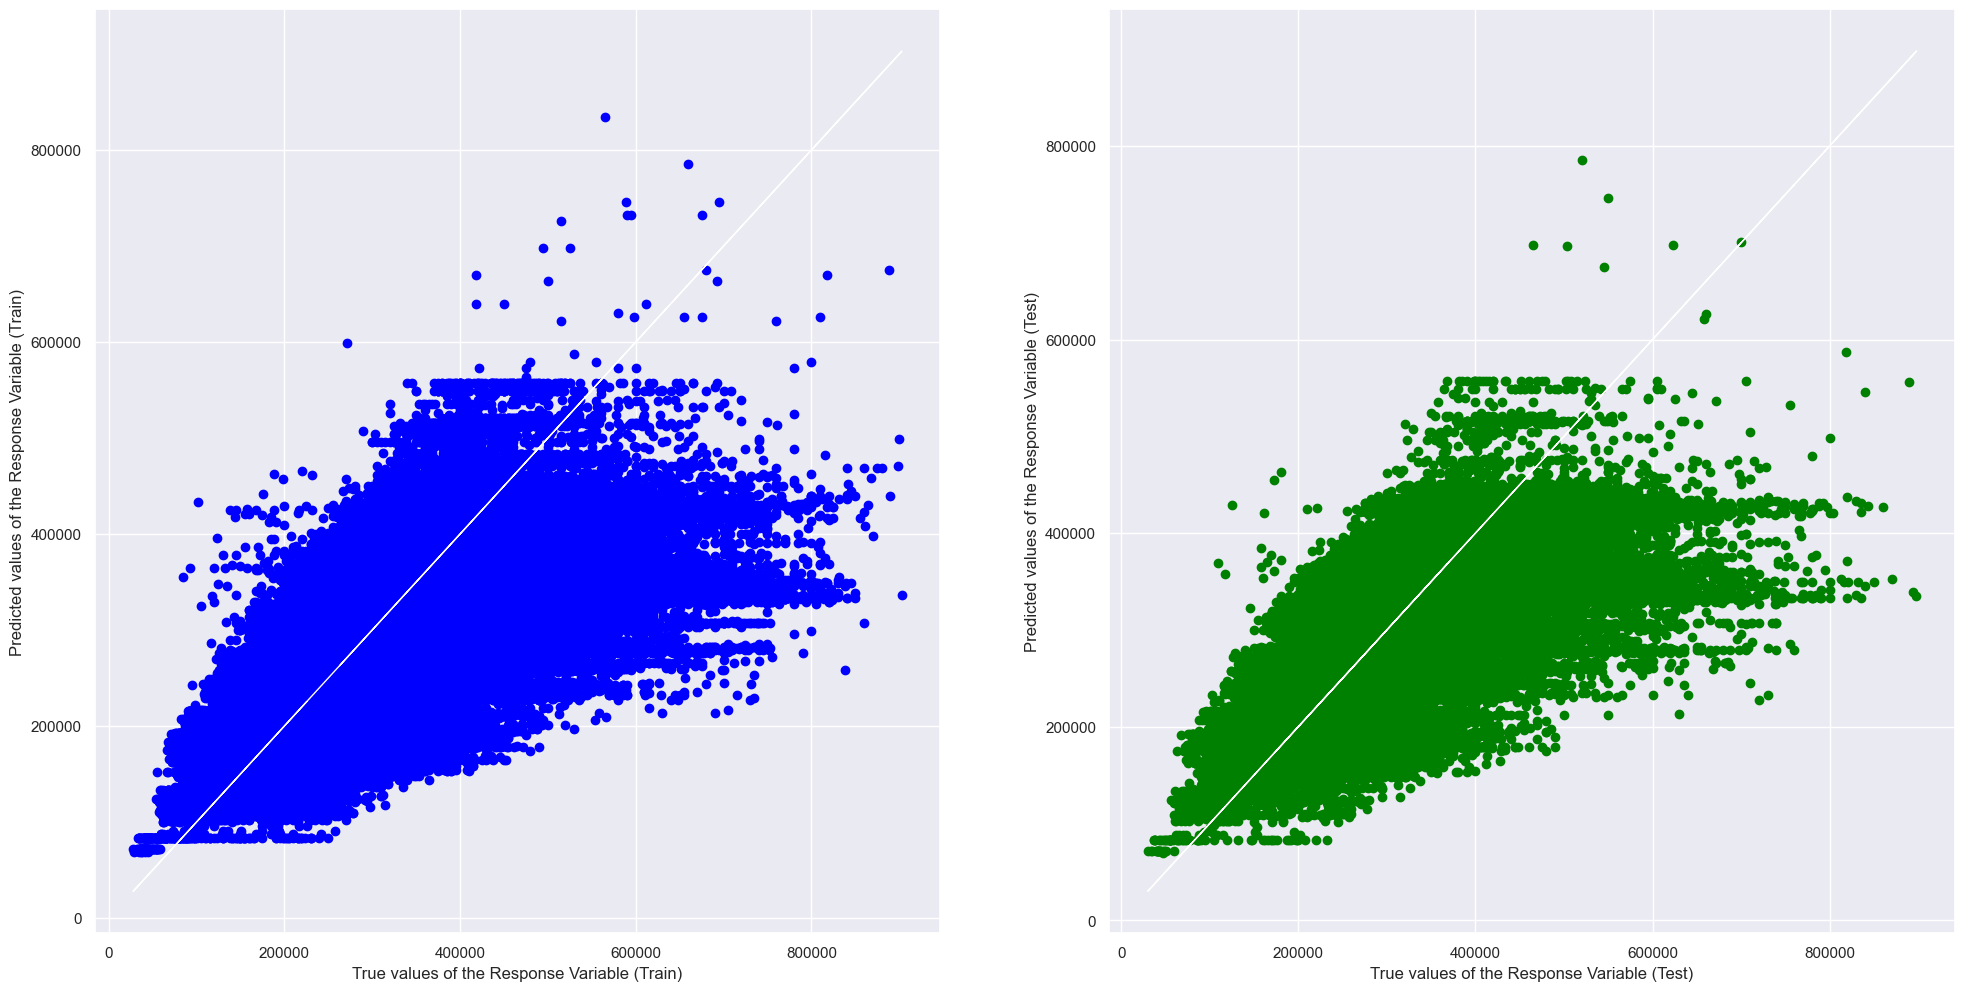

In [45]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [46]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.479977344005595
Mean Squared Error (MSE) on Train Set 	: 6532999162.828653
Mean Squared Error (MSE) on Test Set 	: 6528899573.675967


## MULTIVARIATE REGRESSION FOR DATA WITHOUT OUTLIERS

In [95]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(targetData['resale_price'])
X = pd.DataFrame(targetData[['floor_area_sqm','lease_commence_date']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (290968, 2) (290968, 1)
Test Set  : (72743, 2) (72743, 1)


LinearRegression()

In [96]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-1754416.61312619]
Coefficients 	: a =  [[2690.50227823  891.24140583]]


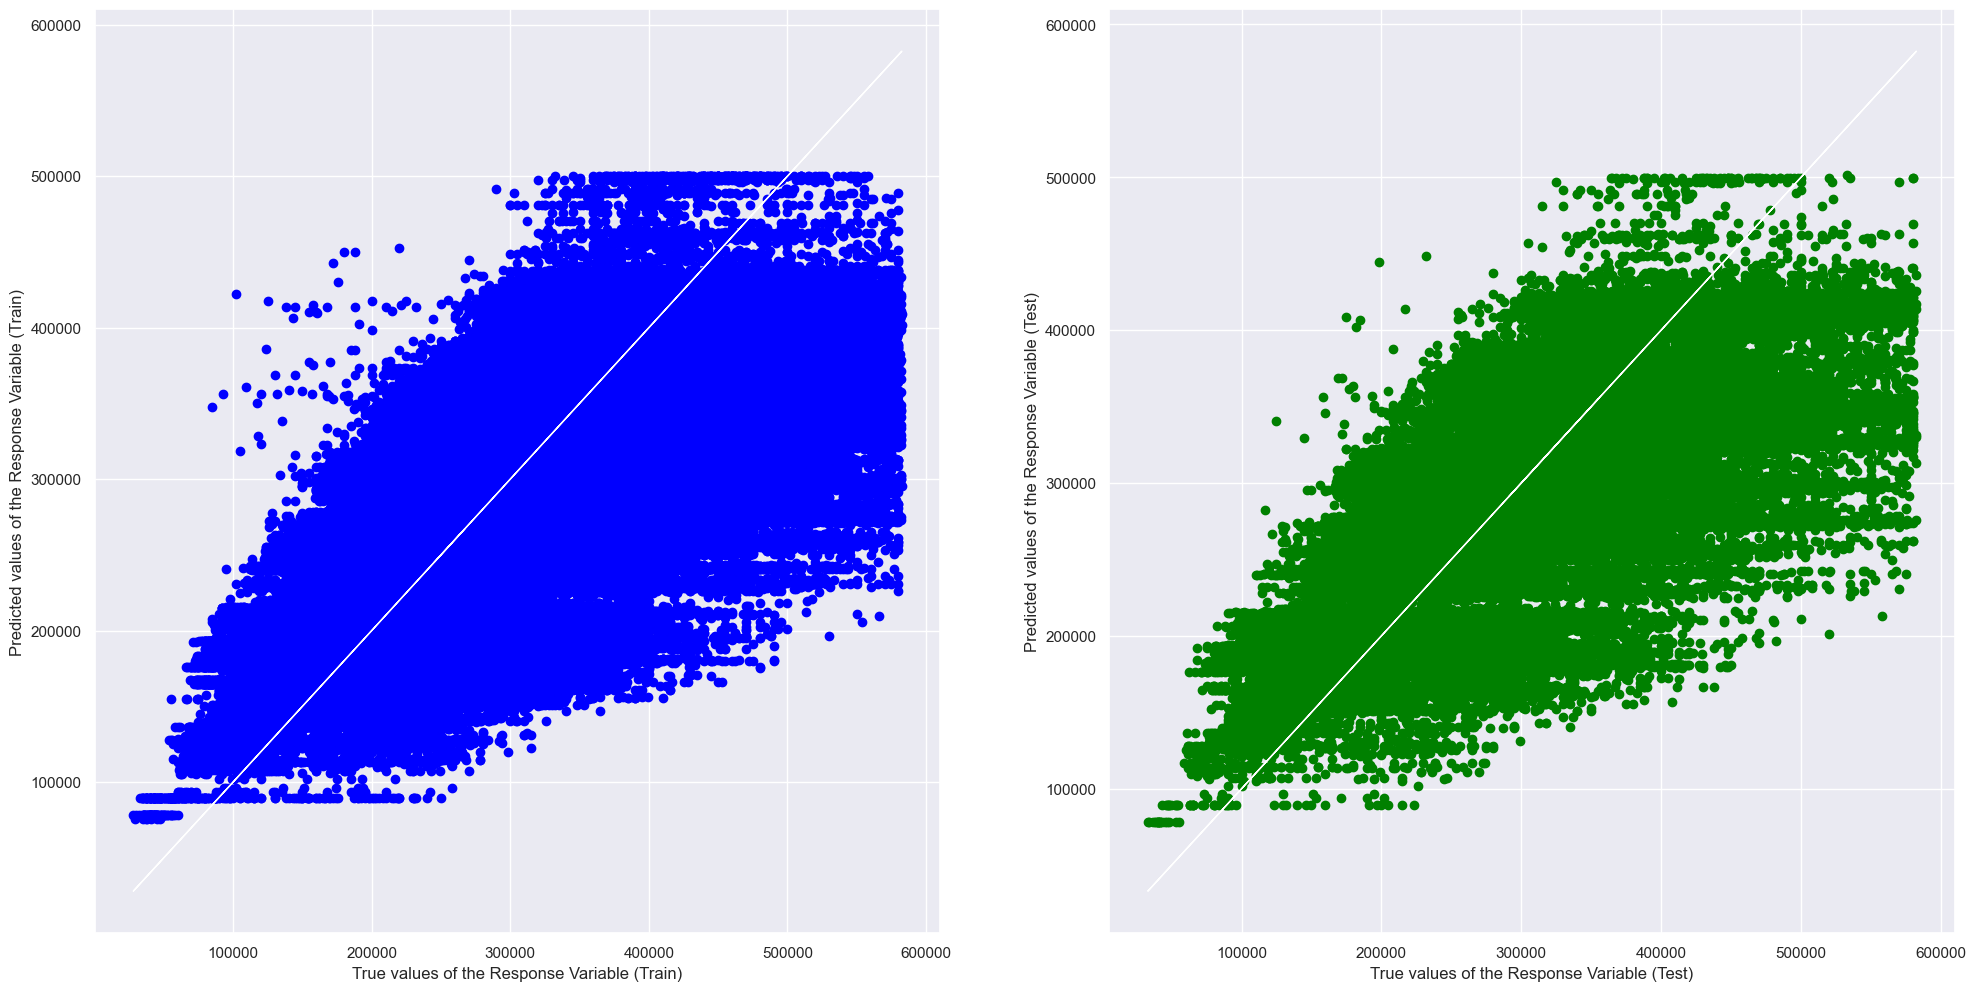

In [97]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [98]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.49701133239806283
Mean Squared Error (MSE) on Train Set 	: 5344327355.892069
Mean Squared Error (MSE) on Test Set 	: 5375351286.690522


## From the Univariate models, we concluded that the model measuring resale_price using floor_area_sqm is the best model compared to floor_area_sqm with outliers or both models of lease_commence_date, due to having the highest explained variance and lowest MSE.

## From the Multivariate models, we concluded that the model without outliers is better than the model with outliers due to lower MSE with similar explained variance.

## Thus, we decided to compare the Univariate floor_area_sqm without outliers model vs the Multivariate without outliers model, and saw that that there was little to no difference in both explained variance and MSE.

## Thus, we can conclude that lease_commence_date has little to no effect on resale_price and floor_area_sqm is the only useful numerical data for measuring resale_price.